<a href="https://colab.research.google.com/github/emailtosanj/ADSP_LAIEDM/blob/development/adsp_laiedm/elective_projects/potential_customers_prediction/Learner_Notebook_Full_Code_Version_Potential_Customers_Prediction_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

Reference:

elective_project_Frequently Asked Questions.docx

In [2]:
# mounting the drive & dataset file path
from google.colab import drive
drive.mount('/content/drive')


#set variable 'file_dir' having the dataset "ExtraaLearn" csv file
import os
file_dir = '/content/drive/MyDrive/adsp_laiedm/elective_projects/Elective Project: Data Analysis and Visualization/potential_customers_prediction/'
os.listdir(file_dir)

Mounted at /content/drive


['Elective_Project_Description-Potential_Customers_Prediction.docx',
 'project_problem_statement_context-objective-datadictionary.docx',
 'ExtraaLearn.csv',
 'Report Template - Potential Customers Prediction.docx',
 'elective_project_Frequently Asked Questions.docx',
 'ML_conceptual_clarification.docx',
 'using colab - How to convert your Project Notebook into html format.pdf',
 'Learner Notebook - Low Code Version - Potential Customers Prediction.ipynb',
 'Learner Notebook - Full Code Version - Potential Customers Prediction.ipynb',
 'Learner Notebook - Full Code Version - Potential Customers Prediction_v3.ipynb']

## Importing necessary libraries and data

In [3]:
#EDA , Data Visualization & Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#rows limiting
pd.set_option('display.max_rows', None)

In [4]:
#load the dataset csv in to pandas dataframe
df = pd.read_csv(file_dir + 'ExtraaLearn.csv')
df.info()

#There are 4612 observations * 15 variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

## Data Overview


  ### Observations & Sanity Checks


*   **4612 observations / records** and **15 variables / columns**.
*   **Data types**
      -  **Numerical cols** (*no of cols - col name - type*)
      
        *   *1 col - page_views_per_visit - float64*
        *   *4 cols - age, website_visits, time_spent_on_website and status - int64*

      -  **Categorical cols** (*no of cols - col name - type*)      

        *   *10 - ID, current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral - object.*

*   **no missing/empty/NaN values for all 15 variables**.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


#### Univariate Analysis on Numerical Columns

*   **Variable types**
      -  **5 Numerical cols** (no of cols - col name - type)
      
        *   *1 col - page_views_per_visit - float64*
        *   *4 cols - age, website_visits, time_spent_on_website and status - int64*

##### Analyze Numerical Variables

*   **age** **(yrs)**

    *   mean - 46, min - 18, max - 63 and mode - 57
    *   outliers range 18 < 36 for leads as per box plot.
    *   majority of leads are in the age rangeof 50 to 63.
    *   imbalance in data minority observation 18 < 36 age compared to age > 36 <= 63.

*   **website_visits:** by a lead **(times)**
    *   mean - 4, min - 0, max - 30 and mode - 2.
    *   distribution skew on right stating outliers in the data.
    *   maximum outliers minority in class having visits > 5.
    *   states two set of leads one with less / no visit than another one for more visits.
*   **time_spent_on_website: (secs)**
    *   mean - 724, min - 0, max - 2537.
    *   distribution is skewed to right and outliers having high end values are present .
    *   median - 376 is less than mean - 724, that represents skewness or long tail end of right.
*   **page_views_per_visit: (pages)**
    *   mean - 2, min - 0, max - 18
    *   multi-modal and skewed right with long tail having high outliers.
    

Observations:

*   **Occupation: Maximum (2616)** leads are **professionals** followed by **leads unemployed (1441)** and **students (555)**.
*   **Website engagement by leads is max. 2542** compared to **mobile app 2070** used by leads.
*   **profile completion percentage count** - 2264 (75-100%) / 2241 (50-75%) / 107 (0-50%).
*   For correspondence **email (2278)** is heavily used by leads followed by **phone (1234)** and **website (1100)**
*   **Low usage of Newspaper (print_media_type1), magazine (print_media_type2), online digital ads and educational channels**.
*   **Referral influence** on leads are **less (93)**.
*   **30% of leads are converted to paid customers** - as per status.







In [6]:
# Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program.
# Find out how current occupation affects lead status.

print('Current Occupation to Customer Status table')
print('\n')
print(pd.crosstab(df['current_occupation'], df['status']))
print('\n')
print(pd.crosstab(df['current_occupation'], df['profile_completed']))

#Q1 Answer: (reference code cell "Current Occupation to Customer Status table")
#Minimal converted professional paid customers (929) compared to their profile completion (2555).
#Only 65 students are paid customer out of 555 students though profile completion is higher (542).
#Only 383 paid unemployed customers out of 1441 in total.
#Profile completion remain high among all three occupation customers.



Current Occupation to Customer Status table


status                 0    1
current_occupation           
Professional        1687  929
Student              490   65
Unemployed          1058  383


profile_completed   High  Low  Medium
current_occupation                   
Professional        1279   61    1276
Student              283   13     259
Unemployed           702   33     706


In [8]:
#Numerical variables descriptibe statistics
print("\nDescriptive statistics of the numeric datatype variables in dataframe:")
display(df.describe(include='number').transpose())


Descriptive statistics of the numeric datatype variables in dataframe:


,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [9]:
def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='b', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

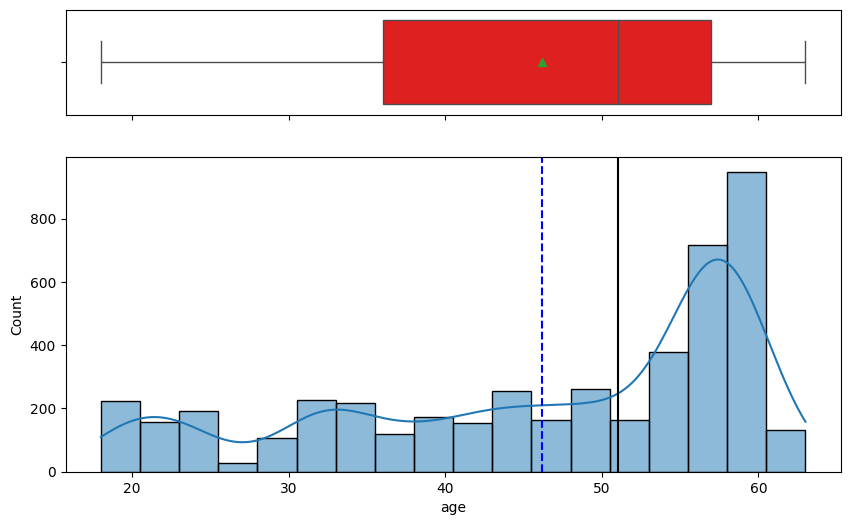

In [10]:
histogram_boxplot(df.age, figsize=(10, 6), bins="auto")

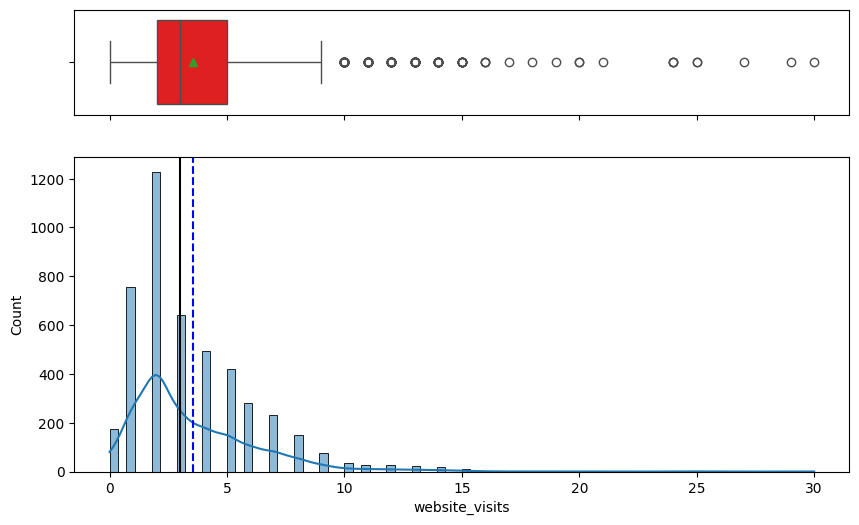

In [11]:
histogram_boxplot(df.website_visits, figsize=(10, 6), bins="auto")

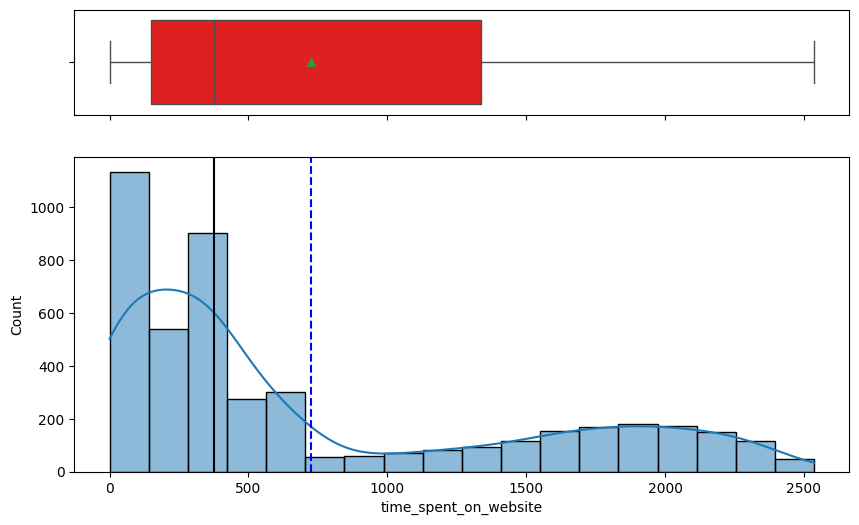

In [12]:
histogram_boxplot(df.time_spent_on_website, figsize=(10, 6), bins="auto")

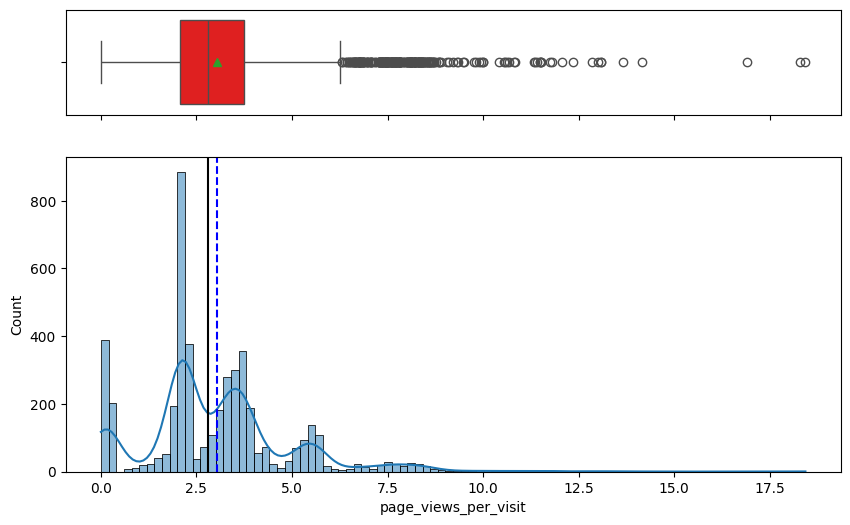

In [13]:
histogram_boxplot(df.page_views_per_visit, figsize=(10, 6), bins="auto")

##### **Univariate analysis on Categorical Variables**

In [14]:

#Categorical variables descriptibe statistics

print("\033[1m\nDescriptive statistics of the object datatype variables in dataframe:\033[0m")
display(df.describe(exclude='number').transpose())



Descriptive statistics of the object datatype variables in dataframe:


,count,unique,top,freq
ID,4612,4612,EXT4612,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


In [15]:
df.print_media_type1.value_counts()

,count
print_media_type1,
No,4115
Yes,497


In [16]:
# Data set variable name its value and unique count
# unique value counts
ls = list(df.columns)
print('\033[1m\nVariable name, unique value  & its count\033[0m')
print('\n')
for col in ls:
  if not col in ['age','ID', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    # print('\033[1m',df[col].value_counts(),'\033[0m')
    print(df[col].value_counts(normalize=True))
    print("*" * 50)


Variable name, unique value  & its count


current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
**************************************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
**************************************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
**************************************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
**************************************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
**************************************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
**************************************************
digital_media
No    

**Observations on categorical variables**

* occupation - more than 55% of leads are professional, 31% are unemployed and 12% are students.
* first point of contact with ExtraaLearn is via website stands at 55% and mobile app ~45%.
* leads profile registration completeness levels high 49%, medium ~49%, low ~2%.
* communication closure among leads and ExtraaLearn via email ~49%, phone ~27% and website ~24%.
* newspaper & magazine ad penetration to leads is ~11% and 5%.
* digital_media ad penetration to leads is ~11%
* euducation channels reach is low ~15%.
* non-rerrals are higher ~98%, referrals being 2%, potentially an area to improve.



### **Bivariate and Multivariate analysis**

**We have analyzed different categorical and numerical variables. Let's now check how does current occupation rate is related with other categorical variables**

* First Interaction with leads (first_interaction)
* Customer profile (profile_completed)
* last activity (last_activity)
* News Paper (print_media_type1)
* Magazine (print_media_type2)
* Advertisement influence (digital_media)
* Online advertisement (educational_channels)
* Referral (referral)
* Paid customer indicator (status)

In [17]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [18]:
df_ori = df.copy()

*********************************************
Last Activity vs Status
*********************************************
status               0    1
last_activity              
Email Activity    1587  691
Phone Activity     971  263
Website Activity   677  423




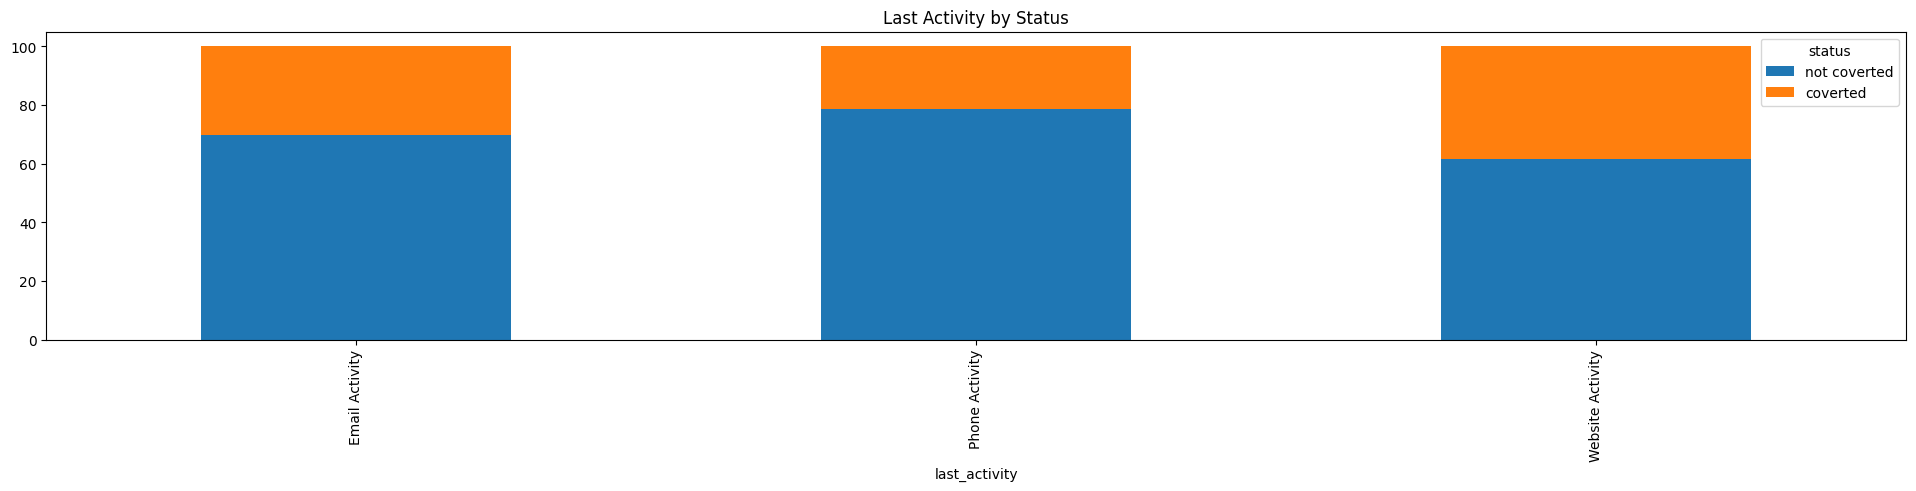

In [19]:
# The company uses multiple modes to interact with prospects. Which way of interaction works best?
# df_grp_by_lst_actvty_stats = df.groupby(['last_activity', 'status']).size().reset_index(name='count')

print('***'*15)
print('Last Activity vs Status')
print('***'*15)
df_last_actvty_stats = (pd.crosstab(df_ori['last_activity'], df_ori['status'])).round(1)
print(df_last_actvty_stats)

################

print('\n')
# print((pd.crosstab(df['last_activity'], df['status'], normalize='index')* 100).round(1))
################

(pd.crosstab(df['last_activity'], df['status'], normalize = 'index')* 100).plot(kind='bar', stacked=True, figsize=(24, 4), title='Last Activity by Status')
plt.legend(title='status', labels=['not coverted', 'coverted'])
plt.show()


#Website activity has
# Website is prevalent among all three interaction modes including phone and email).
# Refer to 'Last Activity by Status' stacked bar plot


# print(971/1234) #phone activity - status 0 - 78.68%
# print(263/1234) #phone activity - status 1 - 21.3%

In [20]:
#  df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)

#The company gets leads from various channels such as print media, digital media, referrals, etc.
# Which of these channels have the highest lead conversion rate?

#education channels - Online forums, discussion threads, educational websites, etc are with highest lead conversion rate.
#education channels do play a vital role in value-proposition among the leads, followed by digital media, news paper and magazine.

#paid customer
# Education channels - 197
# digital_media - 168
# print_media_type1 - 159
# print_media_type2 - 75
# referral - 63

#leads
# Education channels - 508
# digital_media - 359
# print_media_type1 - 338
# print_media_type2 - 158
# referral - 30

# OnEducation channels have higher conversion rate


# type(df_ori)
# check the status per channel
# print(pd.__version__) #2.2.2

df_ori = df.copy()
print('News paper  (print_media_type1):')
df_ori_prnt_media_typ1 = df_ori[df_ori['print_media_type1'] == 'Yes'].astype('category')
print(df_ori_prnt_media_typ1.groupby(by = ['print_media_type1', 'status'], observed=True).size().reset_index(name='count'))

print('\n')

print('Magazine (print_media_type2):')
df_ori['print_media_type2'] = df_ori['print_media_type2'].astype('category')
df_ori_prnt_media_typ2 = df_ori[df_ori['print_media_type2'] == 'Yes']
print(df_ori_prnt_media_typ2.groupby(by = ['print_media_type2', 'status'], observed=True).size().reset_index(name='count'))

print('\n')

print('Digital Media (digital_media):')
df_ori['digital_media'] = df_ori['digital_media'].astype('category')
df_ori_digtal_media = df_ori[df_ori['digital_media'] == 'Yes']
print(df_ori_digtal_media.groupby(by = ['digital_media', 'status'], observed=True).size().reset_index(name='count'))

print('\n')
print('Educational Channels (educational_channels):')
df_ori['educational_channels'] = df_ori['educational_channels'].astype('category')
df_ori_edu_chnl = df_ori[df_ori['educational_channels'] == 'Yes']
print(df_ori_edu_chnl.groupby(by = ['educational_channels', 'status'], observed=True).size().reset_index(name='count'))

print('\n')

print('Referral (referral):')
df_ori['referral'] = df_ori['referral'].astype('category')
df_ori_refral = df_ori[df_ori['referral'] == 'Yes']
print(df_ori_refral.groupby(by = ['referral', 'status'], observed=True).size().reset_index(name='count'))


News paper  (print_media_type1):
  print_media_type1 status  count
0               Yes      0    338
1               Yes      1    159


Magazine (print_media_type2):
  print_media_type2  status  count
0               Yes       0    158
1               Yes       1     75


Digital Media (digital_media):
  digital_media  status  count
0           Yes       0    359
1           Yes       1    168


Educational Channels (educational_channels):
  educational_channels  status  count
0                  Yes       0    508
1                  Yes       1    197


Referral (referral):
  referral  status  count
0      Yes       0     30
1      Yes       1     63


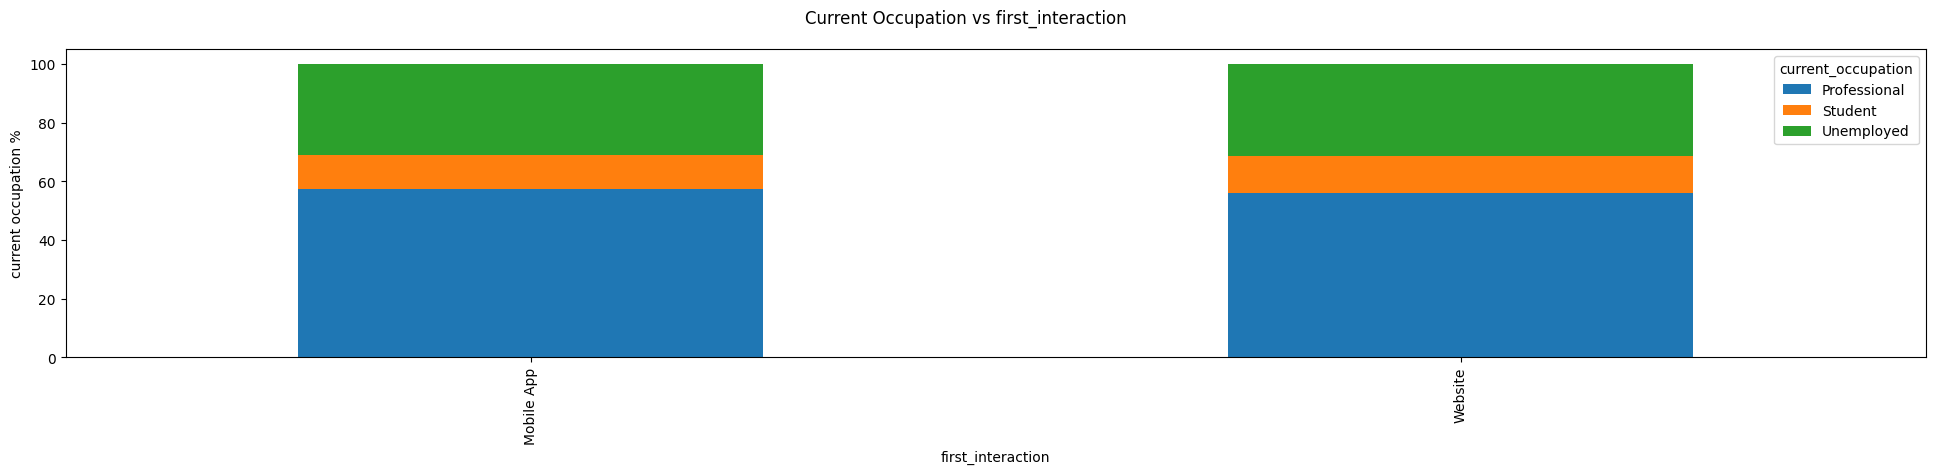

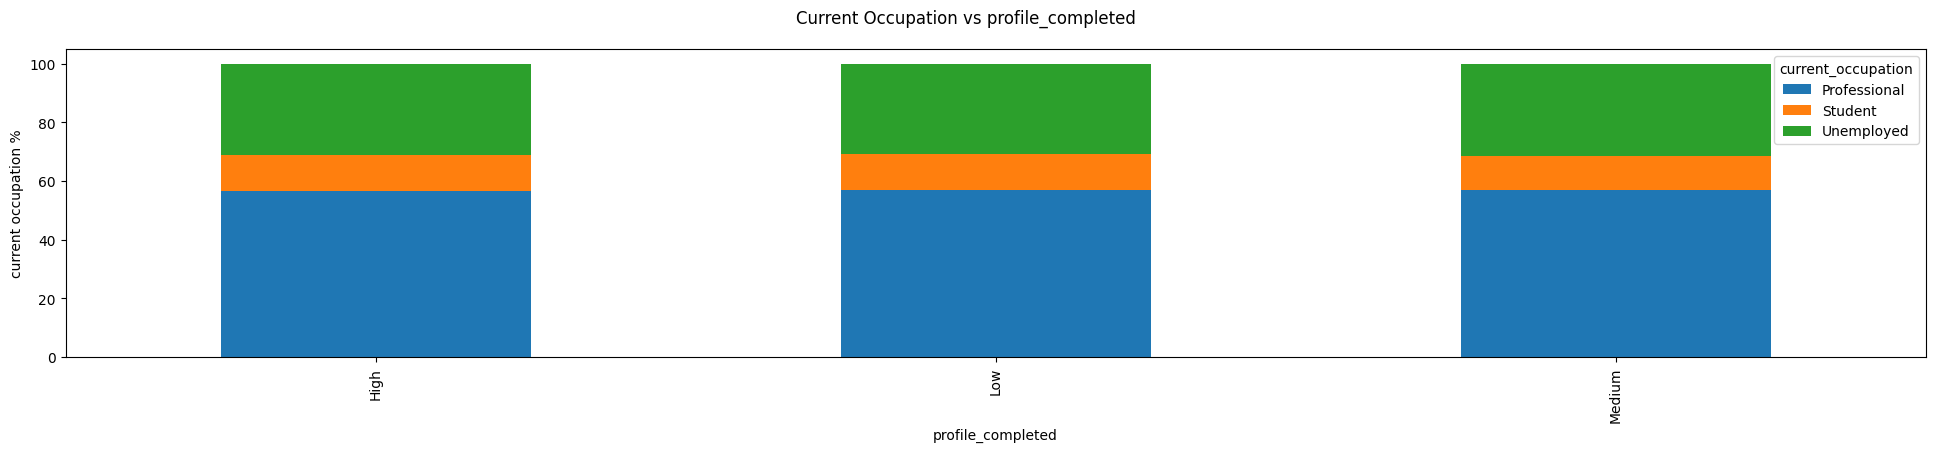

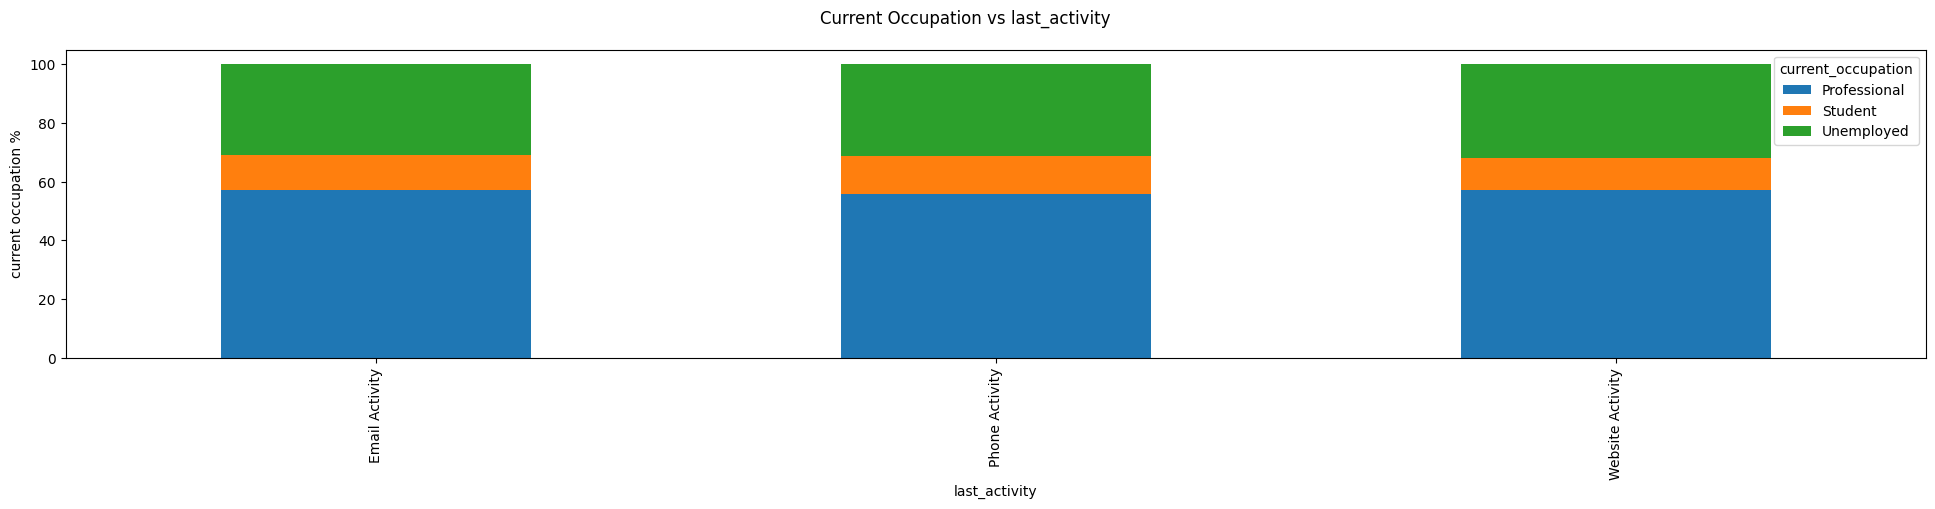

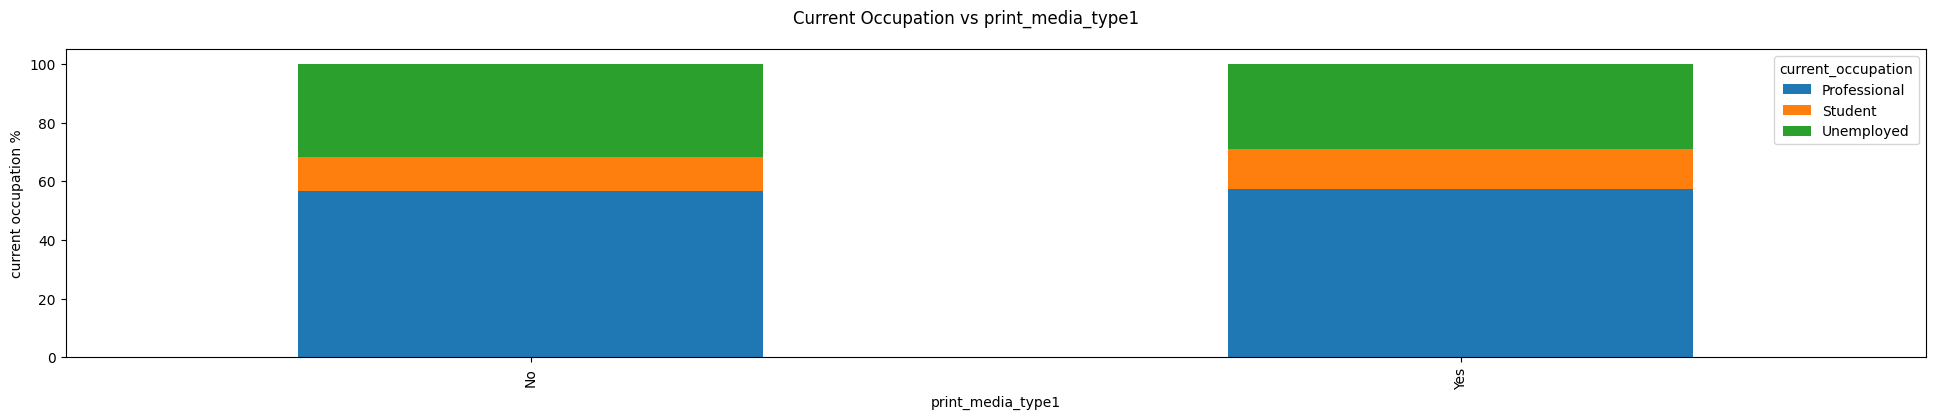

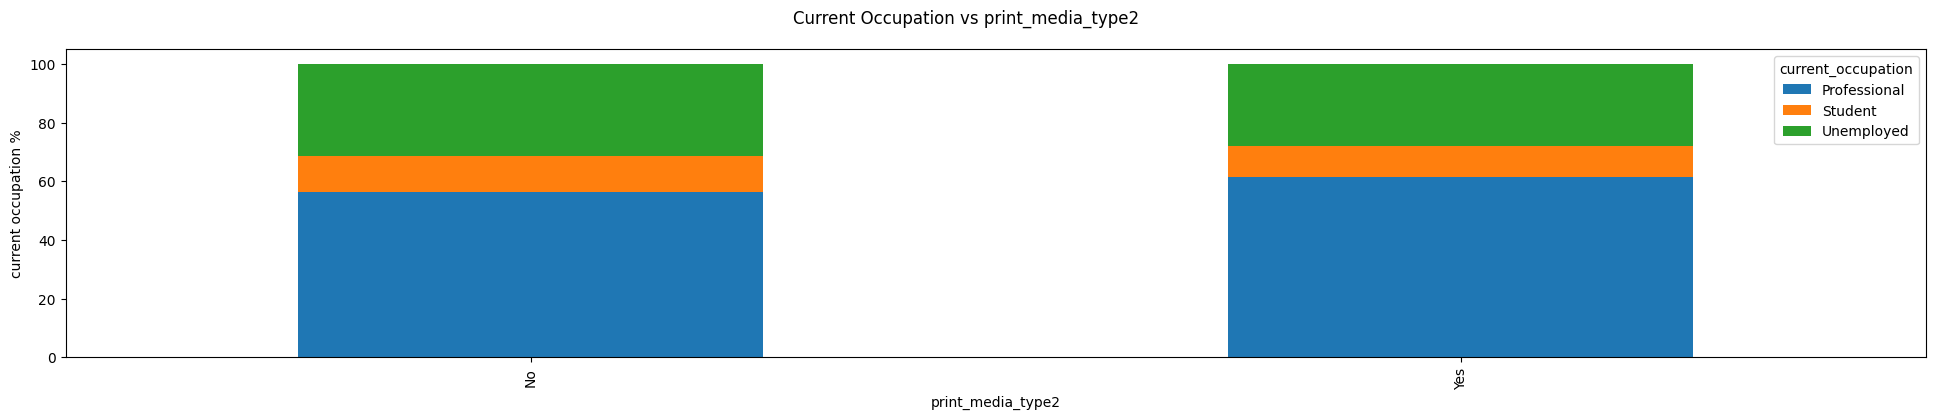

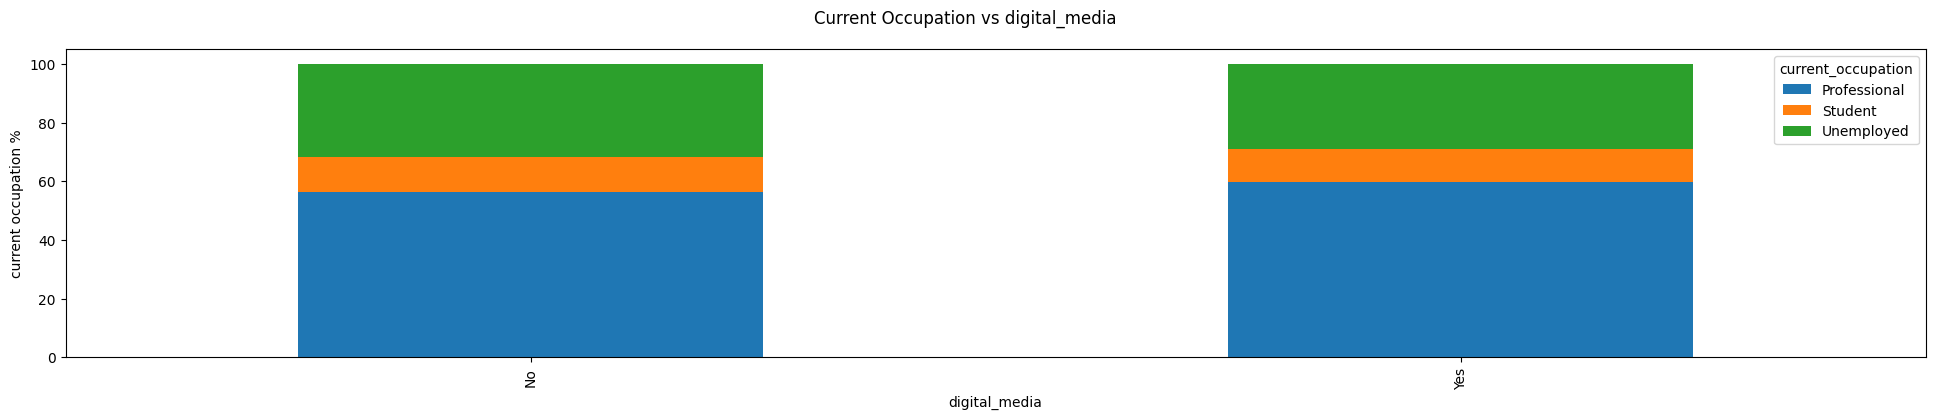

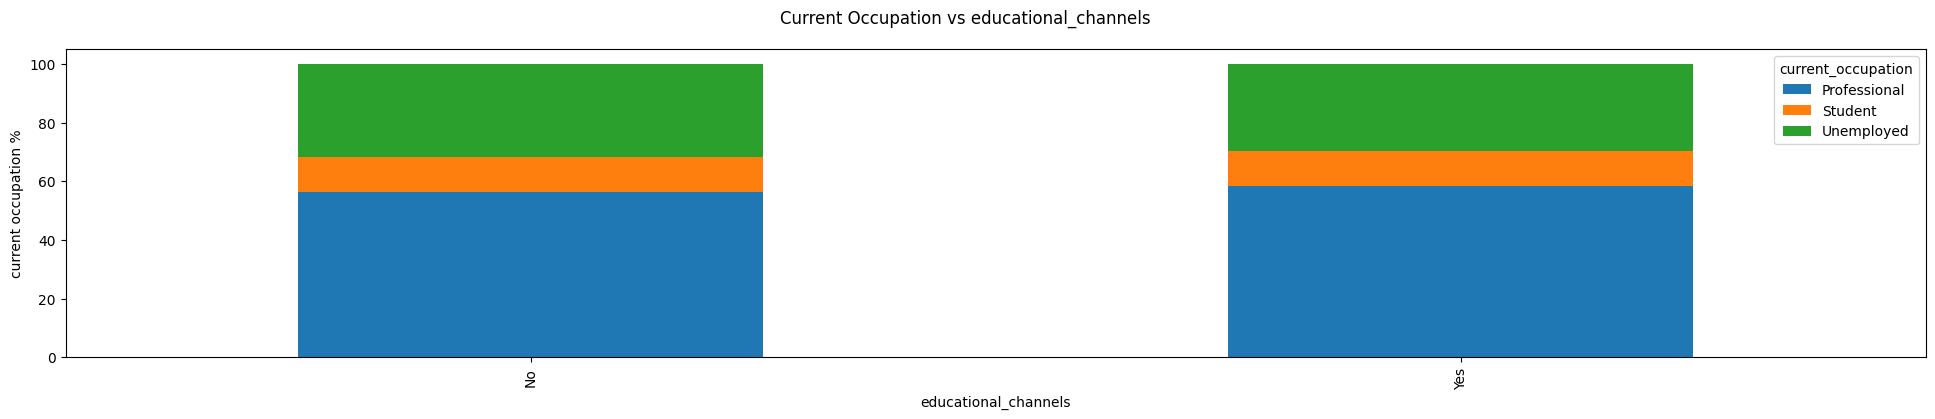

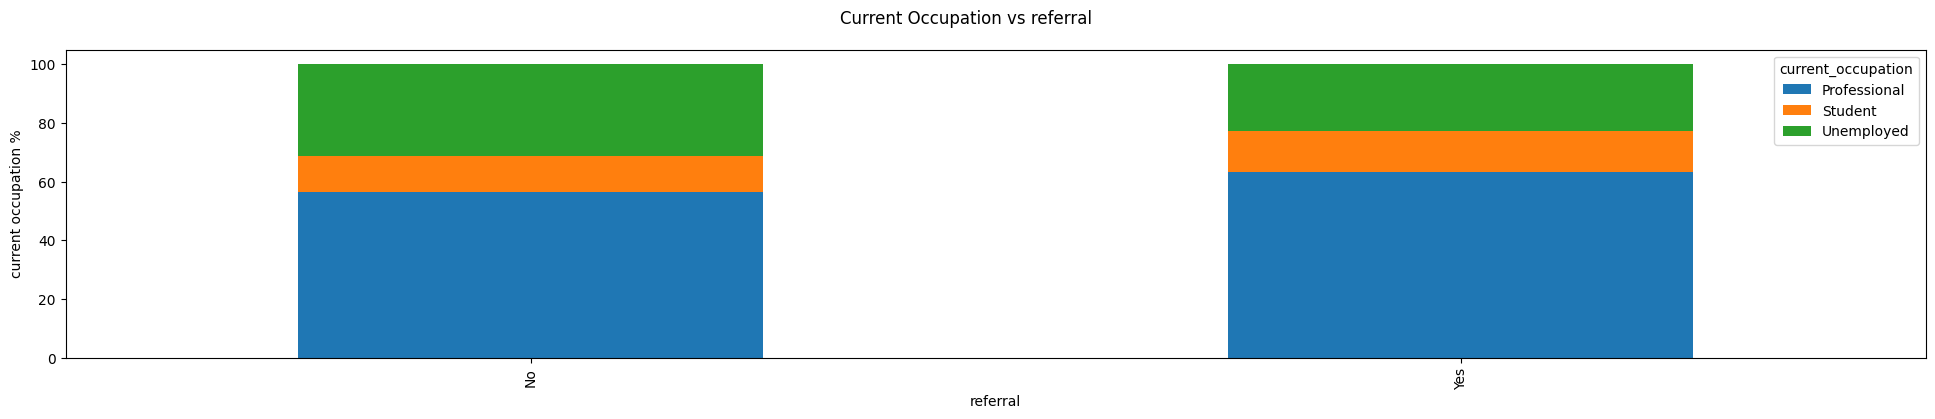

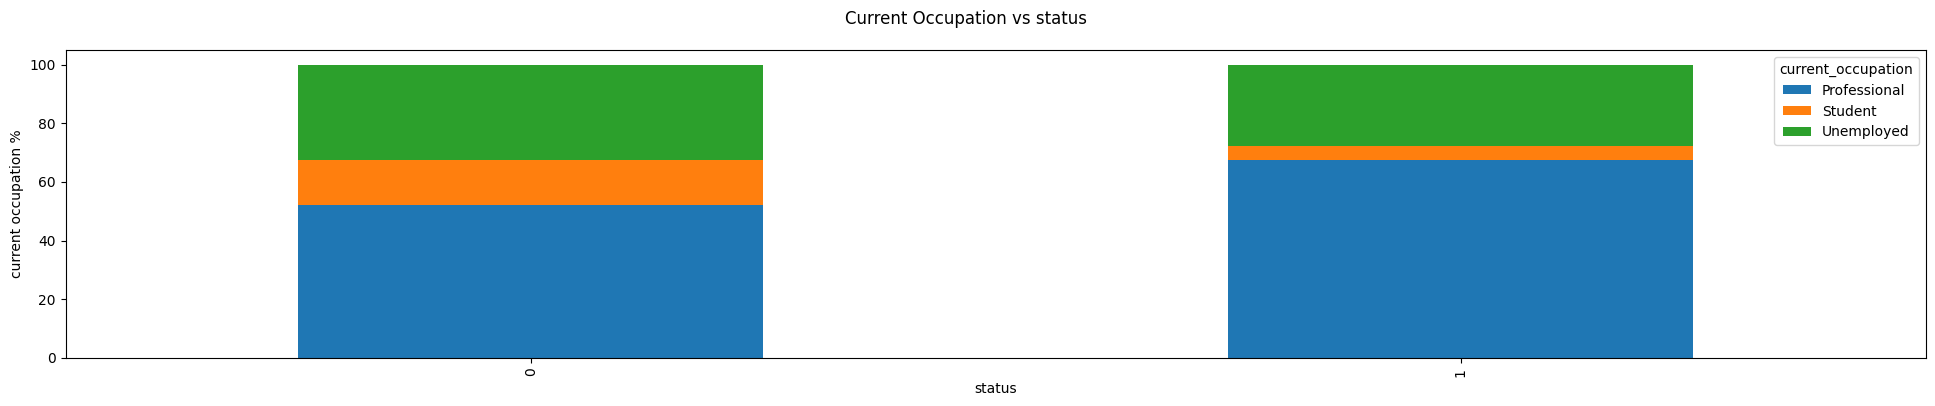

In [21]:
# current_occupation vs categorical columns
ls_cols = list(df.columns)
for col in ls_cols:
  if not col in ['age','current_occupation','ID', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    (pd.crosstab(df[col], df['current_occupation'], normalize = 'index')*100).plot(kind = 'bar', figsize = (24, 4), stacked = True, legend=True, position=0.5)
    plt.suptitle(f'Current Occupation vs {col}')
    plt.ylabel('current occupation %')
    plt.show()


Observations (customer occupation vs categorical columns)

* About 55% leads are processionals using website or mobile / both as their first iteraction medium to reach ExtraaLearn.
* 67% of leads of professional occupation are converted to paid customer
* 63% referral rate are from professionals, followed by unemployed with 23% and students having 13% .
* 5% conversion rate among students remain small.
* Professional leads tend to provide complete profile information stating the interest in the courses followed by Unemployed leads.
* High percentage completion  of profile information has maximum probability for a lead to become a customer.
* Magazine media penetration is higher among professional followed by umemployed and students.



*********************************************
Current occupation vs Status
*********************************************
status                 0     1
current_occupation            
Professional        64.5  35.5
Student             88.3  11.7
Unemployed          73.4  26.6
---------------------------------------------


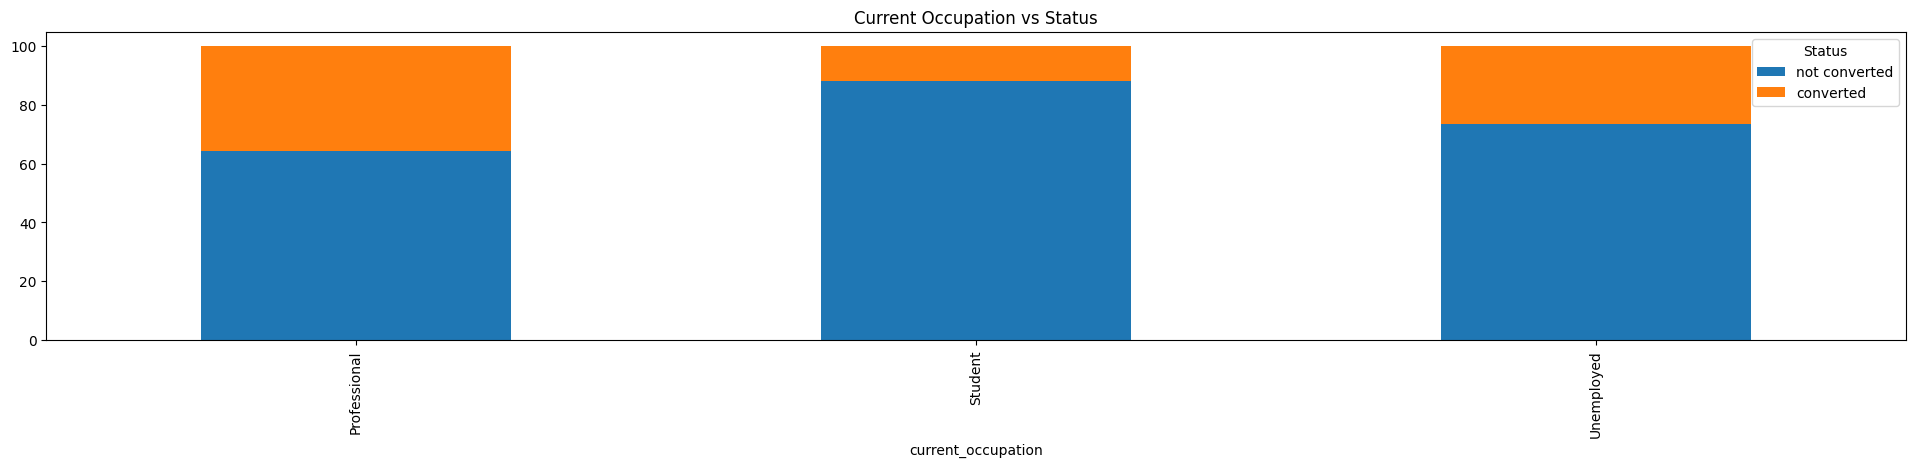

In [22]:
# Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program.
# Find out how current occupation affects lead status.

######
print('***'*15)
print('Current occupation vs Status')
print('***'*15)
print((pd.crosstab(df_ori['current_occupation'], df_ori['status'], normalize='index')*100).round(1))

print('---'*15)

(pd.crosstab(df_ori['current_occupation'], df_ori['status'], normalize='index')*100).plot(kind='bar', stacked=True, figsize=(24,4), title='Current Occupation vs Status')
plt.legend(title='Status', labels=['not converted', 'converted'])
plt.show()

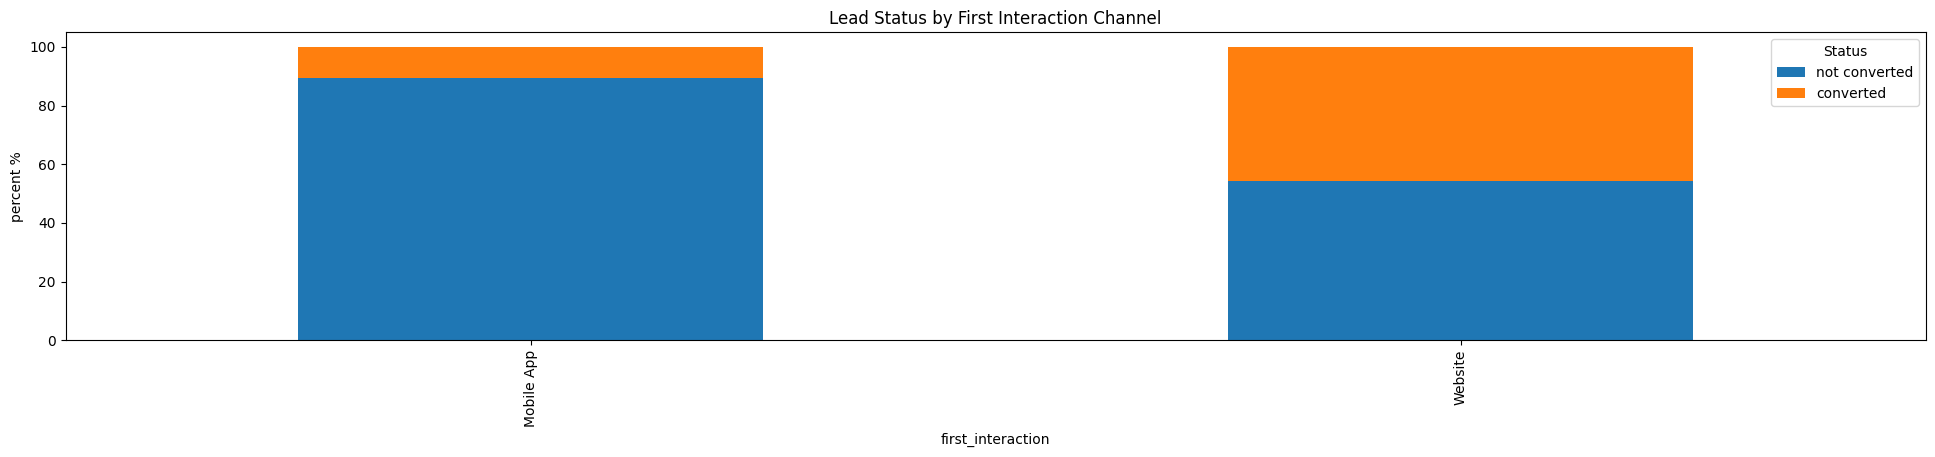

***************************************************************
First Interaction with leads (first_interaction to status)
***************************************************************


status                0     1
first_interaction            
Mobile App         89.5  10.5
Website            54.4  45.6


In [23]:
# The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
#Lead Status by First Interaction Channel


(pd.crosstab(df_ori['first_interaction'], df_ori['status'], normalize = 'index')*100).round(3).plot(kind = 'bar', ylabel='percent %', figsize = (24, 4), stacked = True,  legend=True, position=0.5, title = 'Lead Status by First Interaction Channel')
plt.legend(title='Status', labels=['not converted', 'converted'])
plt.show()

print('***'*21)
print('First Interaction with leads (first_interaction to status)')
print('***'*21)
print('\n')


print(pd.crosstab(df_ori['first_interaction'], df_ori['status'], normalize='index').round(3)*100)

# print(df.groupby(["first_interaction"])["status"].value_counts(normalize=True)*100)
# print('\n')
# print(df.groupby(["first_interaction"])["status"].value_counts(normalize=False))



In [24]:
# The company uses multiple modes to interact with prospects. Which way of interaction works best?
# The company gets leads from various channels such as print media, digital media, referrals, etc.
# Which of these channels have the highest lead conversion rate?

conv_rates = {}

name_to_channel = {
    'print_media_type1': 'newspaper',
    'print_media_type2': 'magazine',
    'digital_media': 'digital_media',
    'educational_channels': 'educational_channels'
}

communication_channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels']

for channel in communication_channels:

  #filter the leads
  channel_leads = df[df[channel] == 'Yes']

  #total num of leads
  total_leads = len(channel_leads)

  if total_leads == 0:
    conv_rates[channel] = 0.0
    continue

  converted_leads_to_cust = channel_leads[channel_leads['status'] == 1]
  conv_rate = len(converted_leads_to_cust) / total_leads
  conv_rates[channel] = conv_rate

print('*'*23)
print('Conversion rate Summary')
print('*'*48)
for channel, rate in conv_rates.items():
  print(f"Conversion rate for {channel}: {rate*100:.2f}%")
print('*'*49)

if conv_rates:
  best_channel = max(conv_rates, key=conv_rates.get)
  highest_rate = conv_rates[best_channel]
  print(f"Channel with highest conversion ratio is  {name_to_channel.get(best_channel)} : {highest_rate*100:.2f}%")
else:
  print('no data available for conv rates')





***********************
Conversion rate Summary
************************************************
Conversion rate for print_media_type1: 31.99%
Conversion rate for print_media_type2: 32.19%
Conversion rate for digital_media: 31.88%
Conversion rate for educational_channels: 27.94%
*************************************************
Channel with highest conversion ratio is  magazine : 32.19%


***************************************************************************
Profile completion vs Status table
-----------------------------------
  profile_completed  status  count
0              High       0   1318
1              High       1    946
2               Low       0     99
3               Low       1      8
4            Medium       0   1818
5            Medium       1    423


***************************************************************************






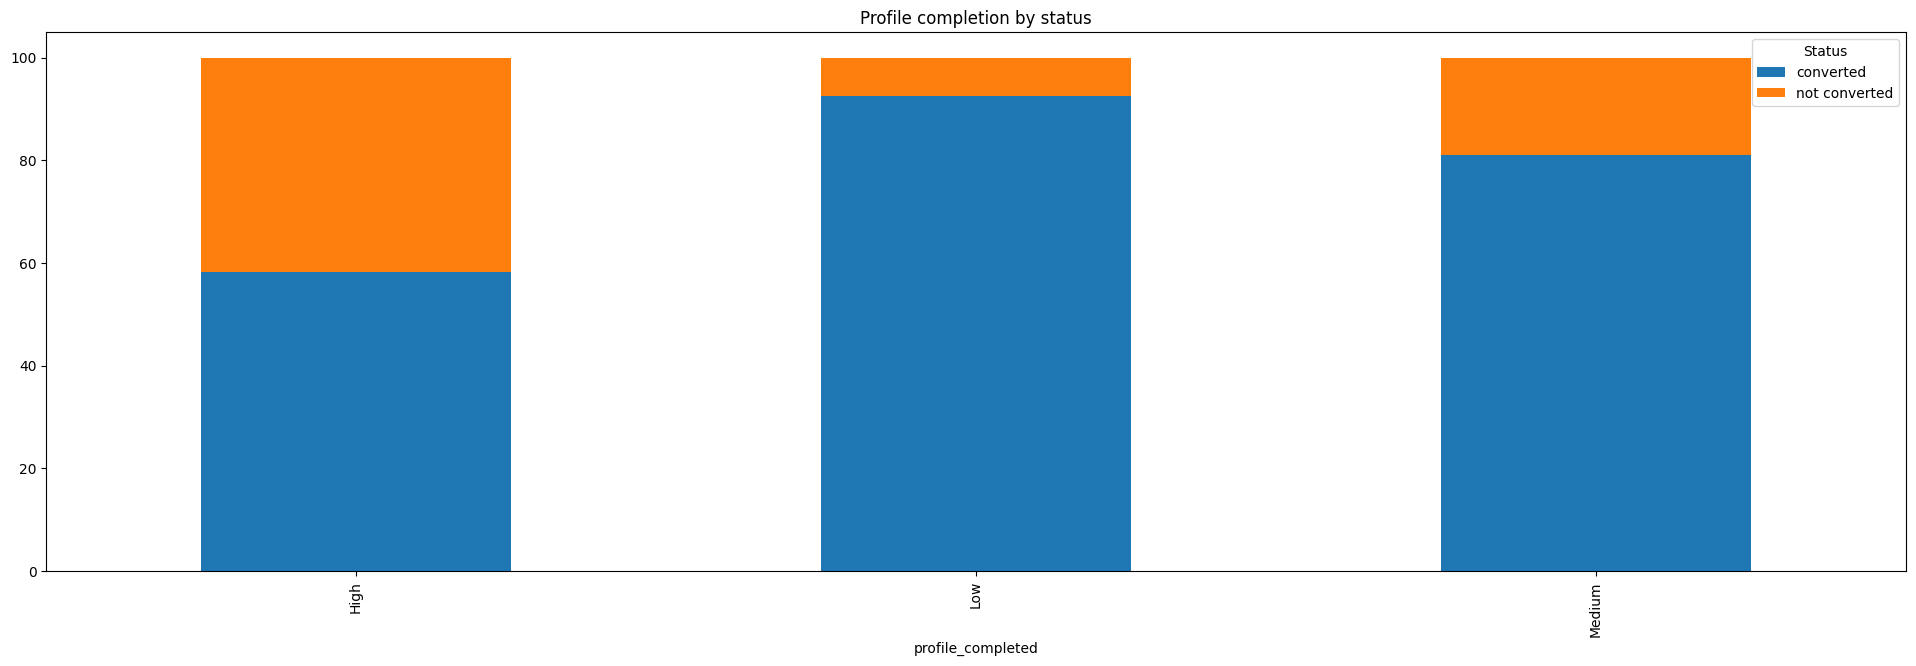

In [25]:
# People browsing the website or mobile application are generally required to create a
# profile by sharing their personal data before they can access additional
# information.
# Does having more details about a prospect increase the chances of conversion


print('***'*25)
print('Profile completion vs Status table')
print('-'*35)
print(df_ori.groupby(by = ['profile_completed', 'status']).size().reset_index(name='count'))
print('\n')

print('***'*25)
print('\n')
print('\n')


(pd.crosstab(df_ori['profile_completed'], df_ori['status'], normalize='index').round(3)* 100).plot(kind='bar', stacked=True, figsize=(24, 7),
                                                                                      title='Profile completion by status')
plt.legend(title='Status', labels=['converted', 'not converted'])
plt.show()
#


# status                     0          1
# profile_completed
# High               58.215548  41.784452
# Low                92.523364   7.476636
# Medium             81.124498  18.875502

# print(type(df_ori.groupby(by = ['status', 'profile_completed']).value_counts())) -# not to use
# 59         # A TypeError occurs if the object does have such a method in its
# MemoryError: Unable to allocate 68.9 PiB for an array with shape (77560466733692928,) and data type int8


**Lets check the conversion status to the relationship of numerical variables**

In [26]:
num_cols = ['age', 'website_visits', 'page_views_per_visit', 'time_spent_on_website']
df.groupby('status')[num_cols].mean()

,age,website_visits,page_views_per_visit,time_spent_on_website
status,,,,
0,45.153014,3.578980,3.025732,577.420711
1,48.663762,3.538126,3.027050,1068.397967


In [27]:
# 50% percentile of time spent by a lead on website -
# 50% leads spend 317 secs at the website -
# 50% of prospective customer / converted lead spend 789 secs at the website.
df.groupby(["status"])["time_spent_on_website"].median()

,time_spent_on_website
status,
0,317.0
1,789.0


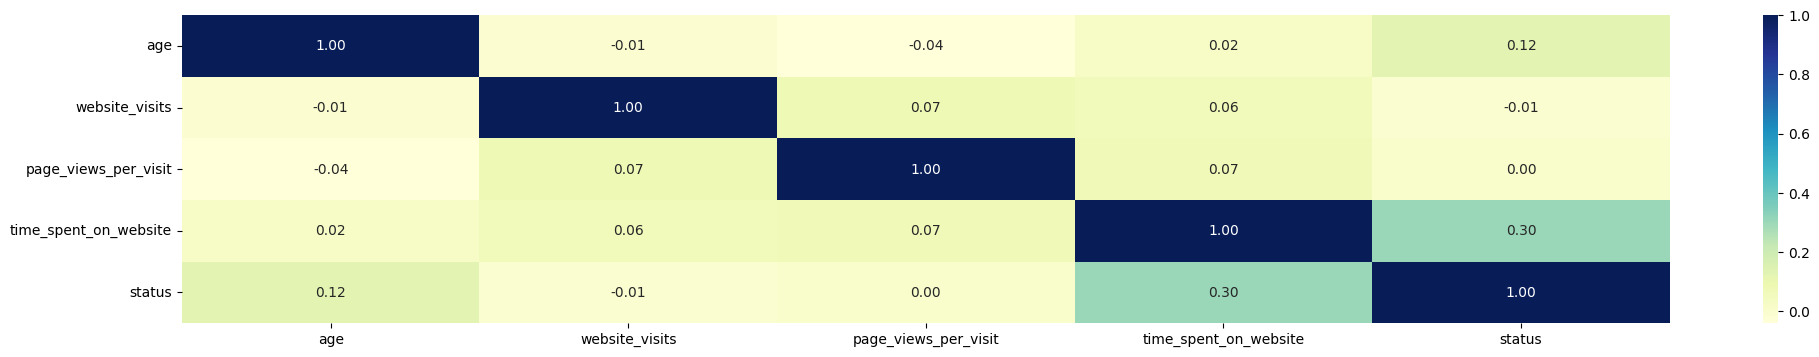

In [28]:
#Relation between different numerical varaibles - correlation
num_cols.append('status')
plt.figure(figsize=(24, 4))
sns.heatmap(df[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')
plt.show()


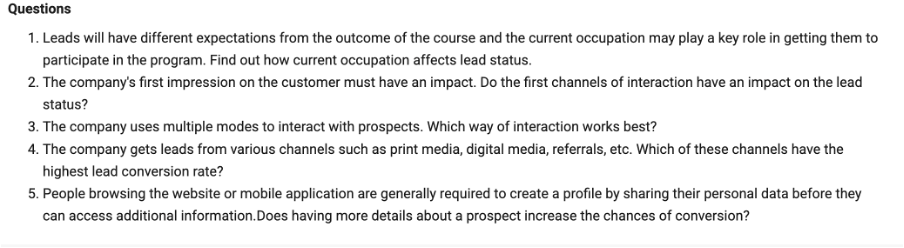

**EDA Observations**:

Q1 Answer: (**Current occupation affecting lead status**)

* Students are highest "not converted" customers 88.3 % followed by unemployed 73.4 % and professionals 65 %.
* Professionals are highest approx. 36 % paid customers followed by unemployed 27 % and students 12 %.


Q2 Answer:
* About 45% paid customer used website as first interaction compared to mobile app being 11%.
* Highest mobile app usage by leads 89%.
* Refer to bar plot title "**Lead Status by First Interaction Channel**"

(reference: BiVariate analysis stacked bar plot)

* Strongest correlation is between status and time_spent_on_website.
* age has almost no linear relationship with website_visits, page_views_per_visit, or time_spent_on_website.

Q3 Answer:
* Website is prevalent among all three interaction modes including phone and email.
* Refer to bar plot title '**Last Activity by Status' stacked**.

Q4 Answer:
* Education channels - Online forums, discussion threads, educational websites, etc are with highest (197) lead conversion rate.
* Education channels do play a vital role in value-proposition among the "not converted" customers, followed by digital media, news paper and magazine.

  Below is the reference count.

*  "converted" customers :
    Education channels - 197,
    digital_media - 168,
    print_media_type1 - 159,
    print_media_type2 - 75,
    referral - 63.

*   "not converted" customers :
    Education channels - 508,
    digital_media - 359,
    print_media_type1 - 338,
    print_media_type2 - 158,
    referral - 30.

Q5 Answer:
* Based on profile completion level  "High" for customers "converted" - 42 % and "not converted" - 58 % it is unlikely to articulate on coversion factor.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [29]:
pd.set_option('display.max_columns', None)
df.head()
# df.referral.value_counts()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [30]:
# one-hot encoding is a powerful and reliable method for nominal categorical variables,
# but it's important to be aware of its limitations and to consider the cardinality and nature of your data before applying it.

# High Cardinality: If a categorical feature has a very large number of unique values (e.g., a country feature with 195 countries), one-hot encoding would create 195 new columns.
#  This can lead to a phenomenon called the curse of dimensionality, which can slow down your model and even hurt its performance.
#  In these cases, you might explore other techniques like target encoding or frequency encoding.

# Binary Variables: For a variable with only two categories (like 'Yes' and 'No'), simple label encoding is often the most efficient and sufficient method.
# One-hot encoding would create two new columns, but one is redundant since you can infer the value of one from the other. For example, if 'Yes' is 1, you know 'No' must be 0.


#label encode the categorical data type variables as new column

#current_occupation
#- Unemployed (one-hot encoding)
current_occupation_unemplyd_mapping = {'Unemployed': 1, 'Student' : 0, 'Professional': 0}
df['current_occupation_unemployed'] = df['current_occupation'].map(current_occupation_unemplyd_mapping)

# - Professional (one-hot encoding)
current_occupation_professional_mapping = {'Unemployed': 0, 'Student' : 0, 'Professional': 1}
df['current_occupation_professional'] = df['current_occupation'].map(current_occupation_professional_mapping)

# - Student (one-hot encoding)
current_occupation_student_mapping = {'Unemployed': 0, 'Student' : 1, 'Professional': 0}
df['current_occupation_student'] = df['current_occupation'].map(current_occupation_student_mapping)
#end - current_occupation encoding

#first_interaction one-hot encoding
first_interaction_web_mapping = {'Website': 1, 'Mobile App' : 0}
df['first_interaction_website'] = df['first_interaction'].map(first_interaction_web_mapping)

first_interaction_mobapp_mapping = {'Website': 0, 'Mobile App' : 1}
df['first_interaction_mobileapp'] = df['first_interaction'].map(first_interaction_mobapp_mapping)
#end first_interaction one-hot encoding

#profile_completed
profile_completed_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['profile_completed_encoded'] = df['profile_completed'].map(profile_completed_mapping)

#last_activity
last_activity_email_mapping = {'Email Activity': 1, 'Phone Activity' : 0, 'Website Activity': 0}
df['last_activity_email'] = df['last_activity'].map(last_activity_email_mapping)

last_activity_phone_mapping = {'Email Activity': 0, 'Phone Activity' : 1, 'Website Activity': 0}
df['last_activity_phone'] = df['last_activity'].map(last_activity_phone_mapping)

last_activity_website_mapping = {'Email Activity': 0, 'Phone Activity' : 0, 'Website Activity': 1}
df['last_activity_website'] = df['last_activity'].map(last_activity_website_mapping)
#end last_activity

#print_media_type1
#- Newspaper (one-hot encoding)
print_media_type1_newspaper_mapping = {'Yes': 1, 'No' : 0}
df['print_media_type1_newspaper'] = df['print_media_type1'].map(print_media_type1_newspaper_mapping)

#print_media_type2
#- Magazine (one-hot encoding)
print_media_type2_magazine_mapping = {'Yes': 1, 'No' : 0}
df['print_media_type2_magazine'] = df['print_media_type2'].map(print_media_type2_magazine_mapping)

#digital_media
#- Digital Media (one-hot encoding)
digital_media_mapping = {'Yes': 1, 'No' : 0}
df['digital_media_encoded'] = df['digital_media'].map(digital_media_mapping)

#educational_channels
#- Educational Channels (one-hot encoding)
educational_channels_mapping = {'Yes': 1, 'No' : 0}
df['educational_channels_encoded'] = df['educational_channels'].map(educational_channels_mapping)

#referral
#- Referral (one-hot encoding)
referral_mapping = {'Yes': 1, 'No' : 0}
df['referral_encoded'] = df['referral'].map(referral_mapping)



In [31]:
#adding a type of media to a total that could help model train and not overfit
df['total_print_media'] = df['print_media_type1'] + df['print_media_type2']
tot_media_mapping = {'YesYes': 0, 'NoNo' : 1, 'YesNo' : 2, 'NoYes': 3}
df['total_print_media'] = df['total_print_media'].map(tot_media_mapping)

In [32]:
df.columns

Index(['ID', 'age', 'current_occupation', 'first_interaction',
       'profile_completed', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'last_activity', 'print_media_type1',
       'print_media_type2', 'digital_media', 'educational_channels',
       'referral', 'status', 'current_occupation_unemployed',
       'current_occupation_professional', 'current_occupation_student',
       'first_interaction_website', 'first_interaction_mobileapp',
       'profile_completed_encoded', 'last_activity_email',
       'last_activity_phone', 'last_activity_website',
       'print_media_type1_newspaper', 'print_media_type2_magazine',
       'digital_media_encoded', 'educational_channels_encoded',
       'referral_encoded', 'total_print_media'],
      dtype='object')

In [33]:
#Decision Tree / Random forest classifier / Gradient Boosting are not sensitive to magnitude of variables.
#so standardization or normalization is not needed before fitting tree-based models.


#TODO - remove scaling
#scaling numerical columns
# from sklearn.preprocessing import StandardScaler
# cols_to_scale = ['page_views_per_visit', 'website_visits', 'time_spent_on_website']
# std_scaler = StandardScaler()
# df[cols_to_scale] = std_scaler.fit_transform(df[cols_to_scale])

# # Reshape the data before applying the scaler : -1 for all rows and 1 resulting to have one column
# age_data = df['age'].values.reshape(-1, 1)

# # Fit and transform the data
# df['age_scaled'] = std_scaler.fit_transform(age_data)

In [34]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_unemployed,current_occupation_professional,current_occupation_student,first_interaction_website,first_interaction_mobileapp,profile_completed_encoded,last_activity_email,last_activity_phone,last_activity_website,print_media_type1_newspaper,print_media_type2_magazine,digital_media_encoded,educational_channels_encoded,referral_encoded,total_print_media
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1,1,0,0,1,0,2,0,0,1,1,0,1,0,0,2
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1,1,0,0,1,0,2,0,0,1,0,0,0,0,0,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0,0,0,1,1,0,2,1,0,0,0,0,0,0,0,1


In [35]:
#drop unwanted columns
df_ori = df.copy()
df.drop(columns=['ID','age','current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral'], inplace=True)

In [36]:
#train test split into 70% train and 30% for test
# stratify = <target variable>: This is a crucial parameter for imbalanced datasets like yours (where the number of employees who attrite is much smaller than those who don't). stratify=Y ensures that the proportion of the target variable (Attrition) is the same in both the training and testing sets as it is in the original dataset. This helps to prevent scenarios where the test set might have very few or no instances of the minority class.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['status']), df['status'], test_size=0.3, random_state=42, stratify= df['status'])


In [37]:
# print('check records - train test')

# print(len(y_train[y_train == 1]) + len(y_test[y_test == 1]))
# print(len(y_train[y_train == 0]) + len(y_test[y_test == 0]))
# print(1377 + 3235)


# # print(y_train.shape)
# print('\n')

#imbalance weights
convrted = round((len(y_train[y_train == 1]) + len(y_test[y_test == 1])) / 4612, ndigits=2)
print(convrted)
not_convrted =  round((len(y_train[y_train == 0]) + len(y_test[y_test == 0])) / 4612, ndigits=2)
print(not_convrted)

check records - train test
1377
3235
4612


0.3
0.7


## Building a Decision Tree model

In [38]:
#import all the required libraries for Decision tree

import numpy as np
from sklearn.tree import DecisionTreeClassifier

#import function to model train and test
from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn import metrics

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Model Performance evaluation and improvement

In [39]:
#metrics function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    # sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Attriate', 'Attriate'], yticklabels = ['Not Attriate', 'Attriate'])
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['not converted', 'converted'], yticklabels = ['not converted', 'converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [40]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: convrted, 1: not_convrted}, random_state = 1)

In [41]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



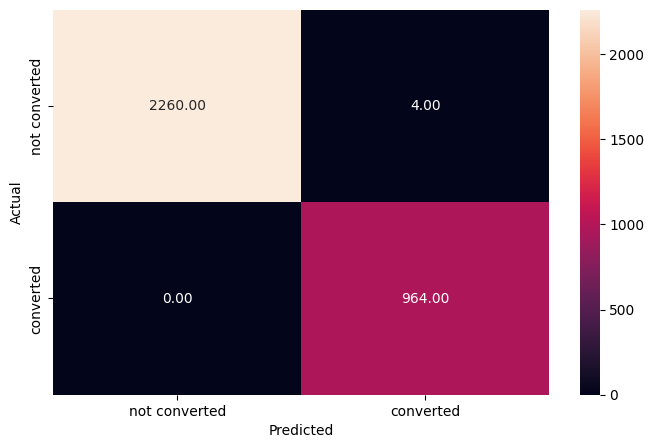

In [42]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       971
           1       0.67      0.68      0.68       413

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



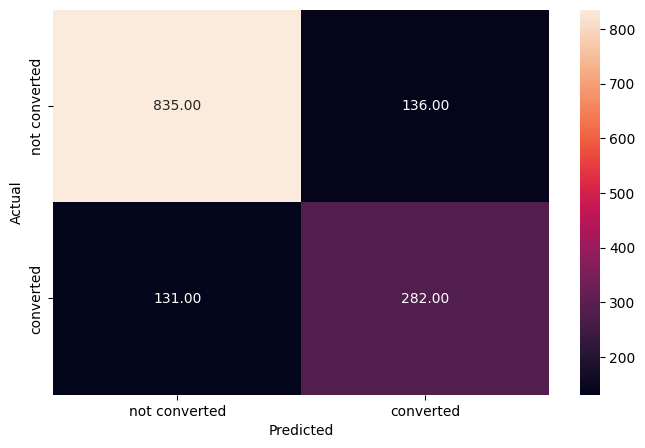

In [43]:
# check performance on test set
y_test_pred_dt = dt.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

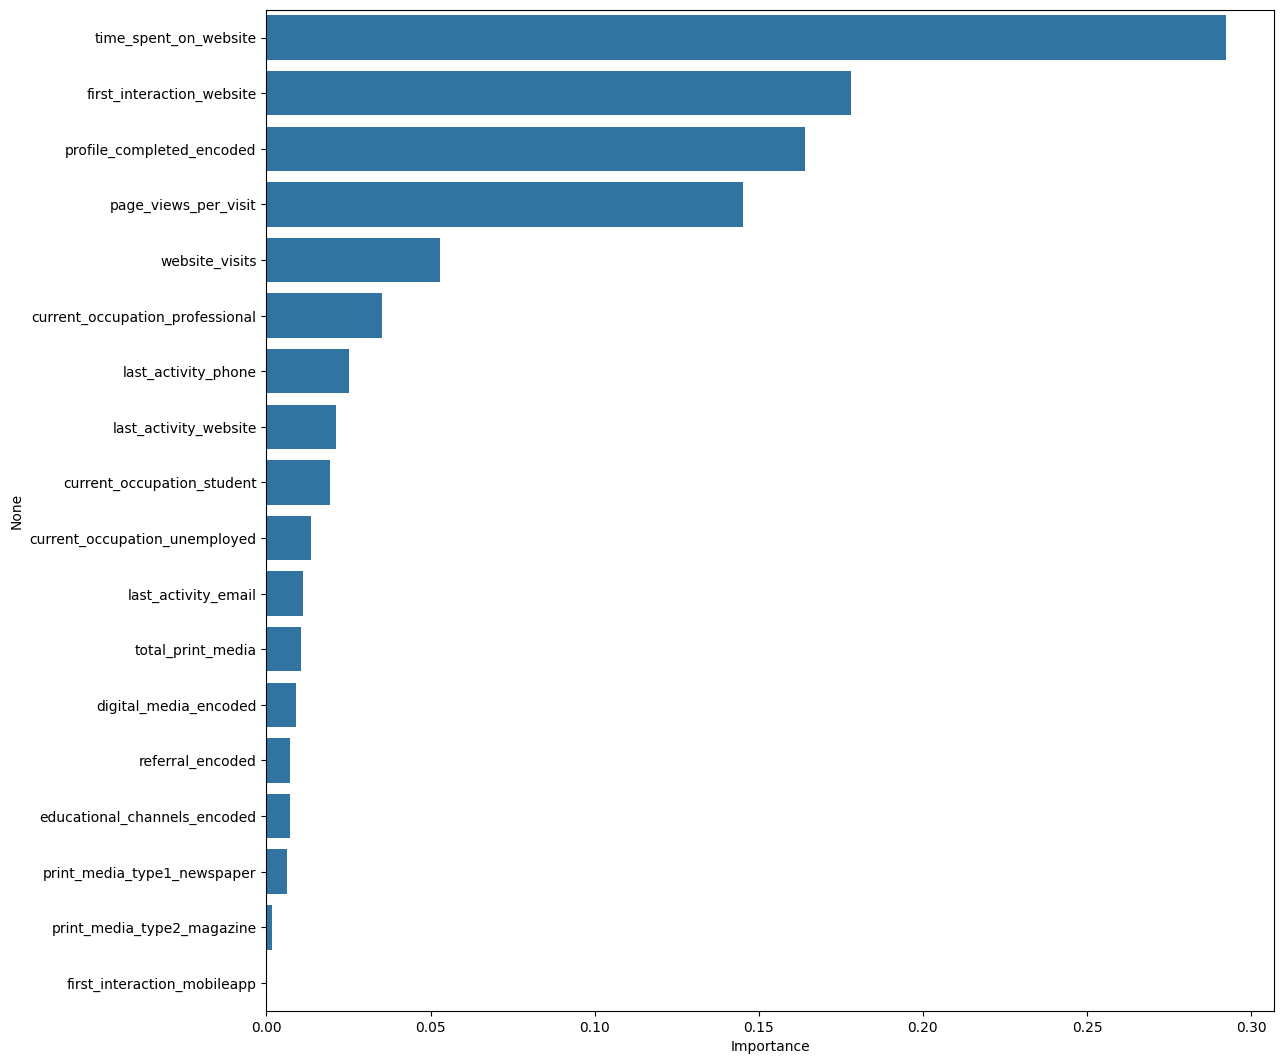

In [44]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

In [45]:
print(dt.feature_importances_.shape)

(18,)


**Observations:**

* Features with high importance are listed with high priority from top to bottom.
* According to the Decision Tree **time spent on website is the most important feature followed by first interaction, profile completion and viewing learning content**.
* Age, website visits, professionals and their activity of enagement are also important features of prospective customers.


In [46]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=np.int64(3), min_samples_leaf=5,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.75      0.84      2264
           1       0.61      0.89      0.72       964

    accuracy                           0.80      3228
   macro avg       0.78      0.82      0.78      3228
weighted avg       0.84      0.80      0.80      3228



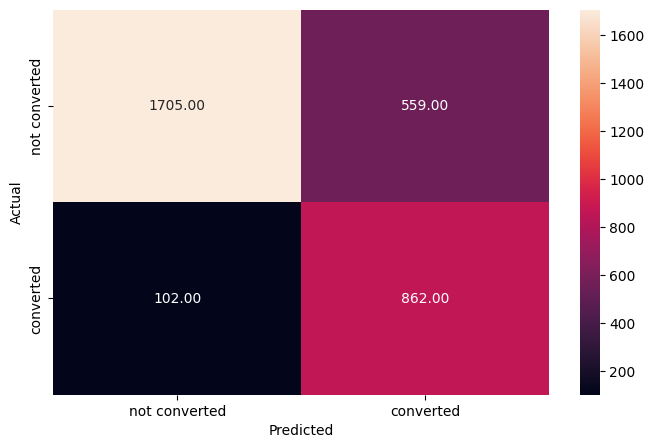

In [47]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       971
           1       0.61      0.90      0.73       413

    accuracy                           0.80      1384
   macro avg       0.78      0.83      0.79      1384
weighted avg       0.85      0.80      0.81      1384



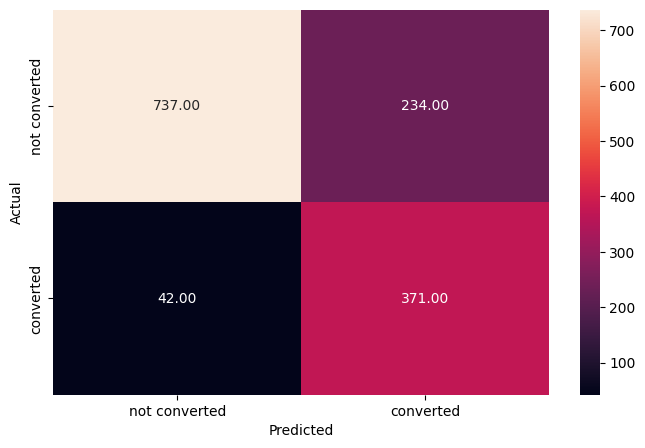

In [48]:
# # check performance on test set
# y_test_pred_dt = dt.predict(X_test)
# metrics_score(y_test, y_test_pred_dt)

y_test_pred_dt = dtree_estimator.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

**Observations:**

* recall score has improved with tuned model compared to untuned model which resulted in overfitting.  
* precision and f1-score value of decision tree also have got improved.


In [49]:
print(dtree_estimator.feature_importances_.shape)

(18,)


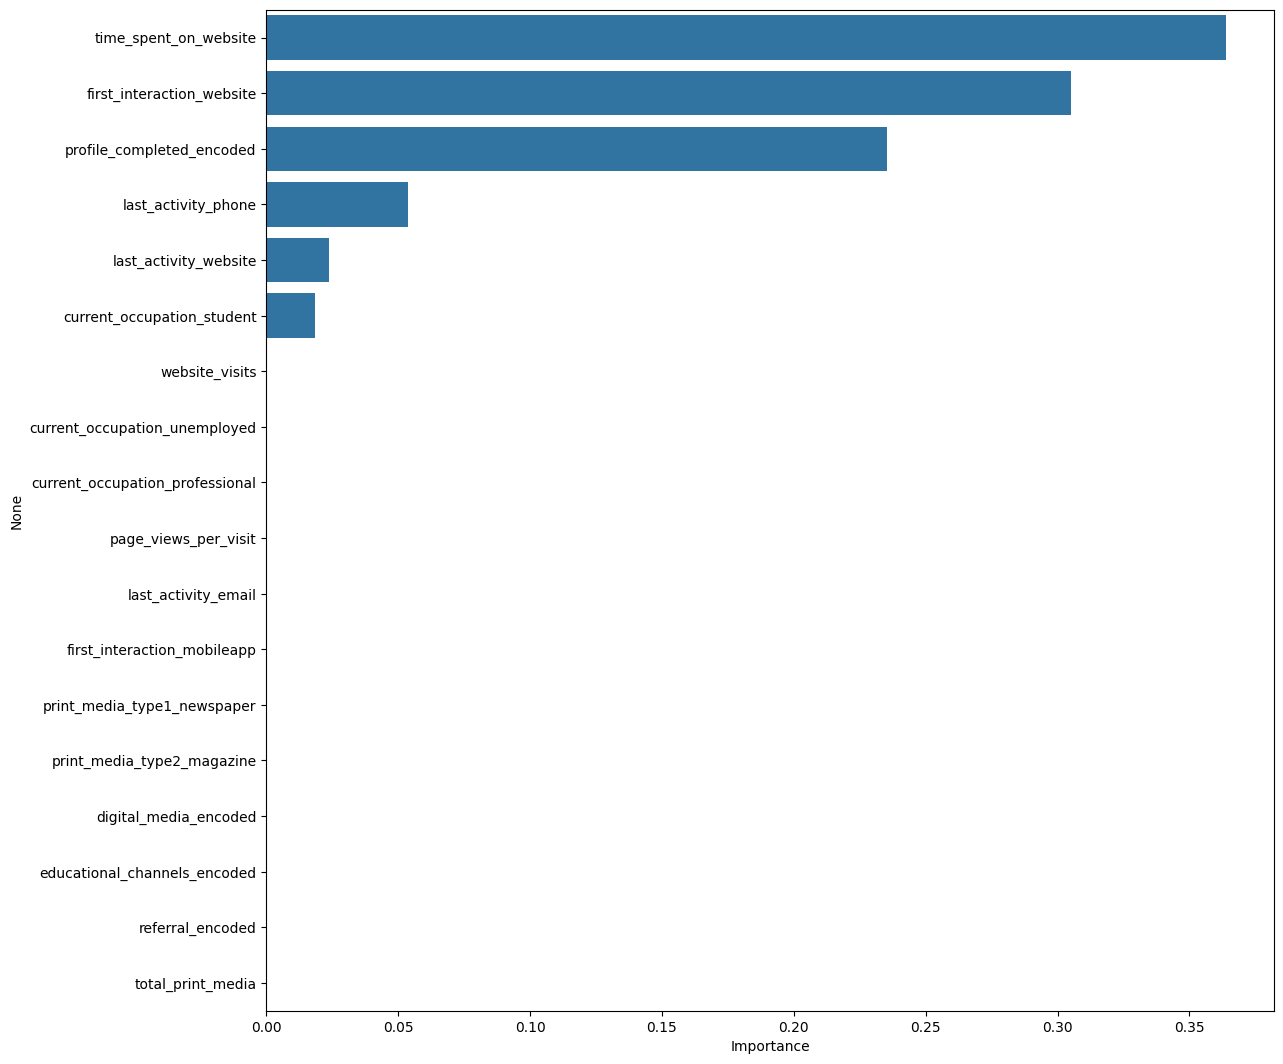

In [50]:
importances = dtree_estimator.feature_importances_
columns = df.drop(columns=['status']).columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x= importance_df.Importance, y= importance_df.index);

**Observations:**



*   Based on tuned model (Decision Trees) engagement with the leads is critical.
*   Time spent and interaction of leads with website, profile completion are vital factors of conversion.
*   Other features of less priority are converse of leads over phone, website and age.

Having these three main features lets plot a tree and checkout with max depth of 4.



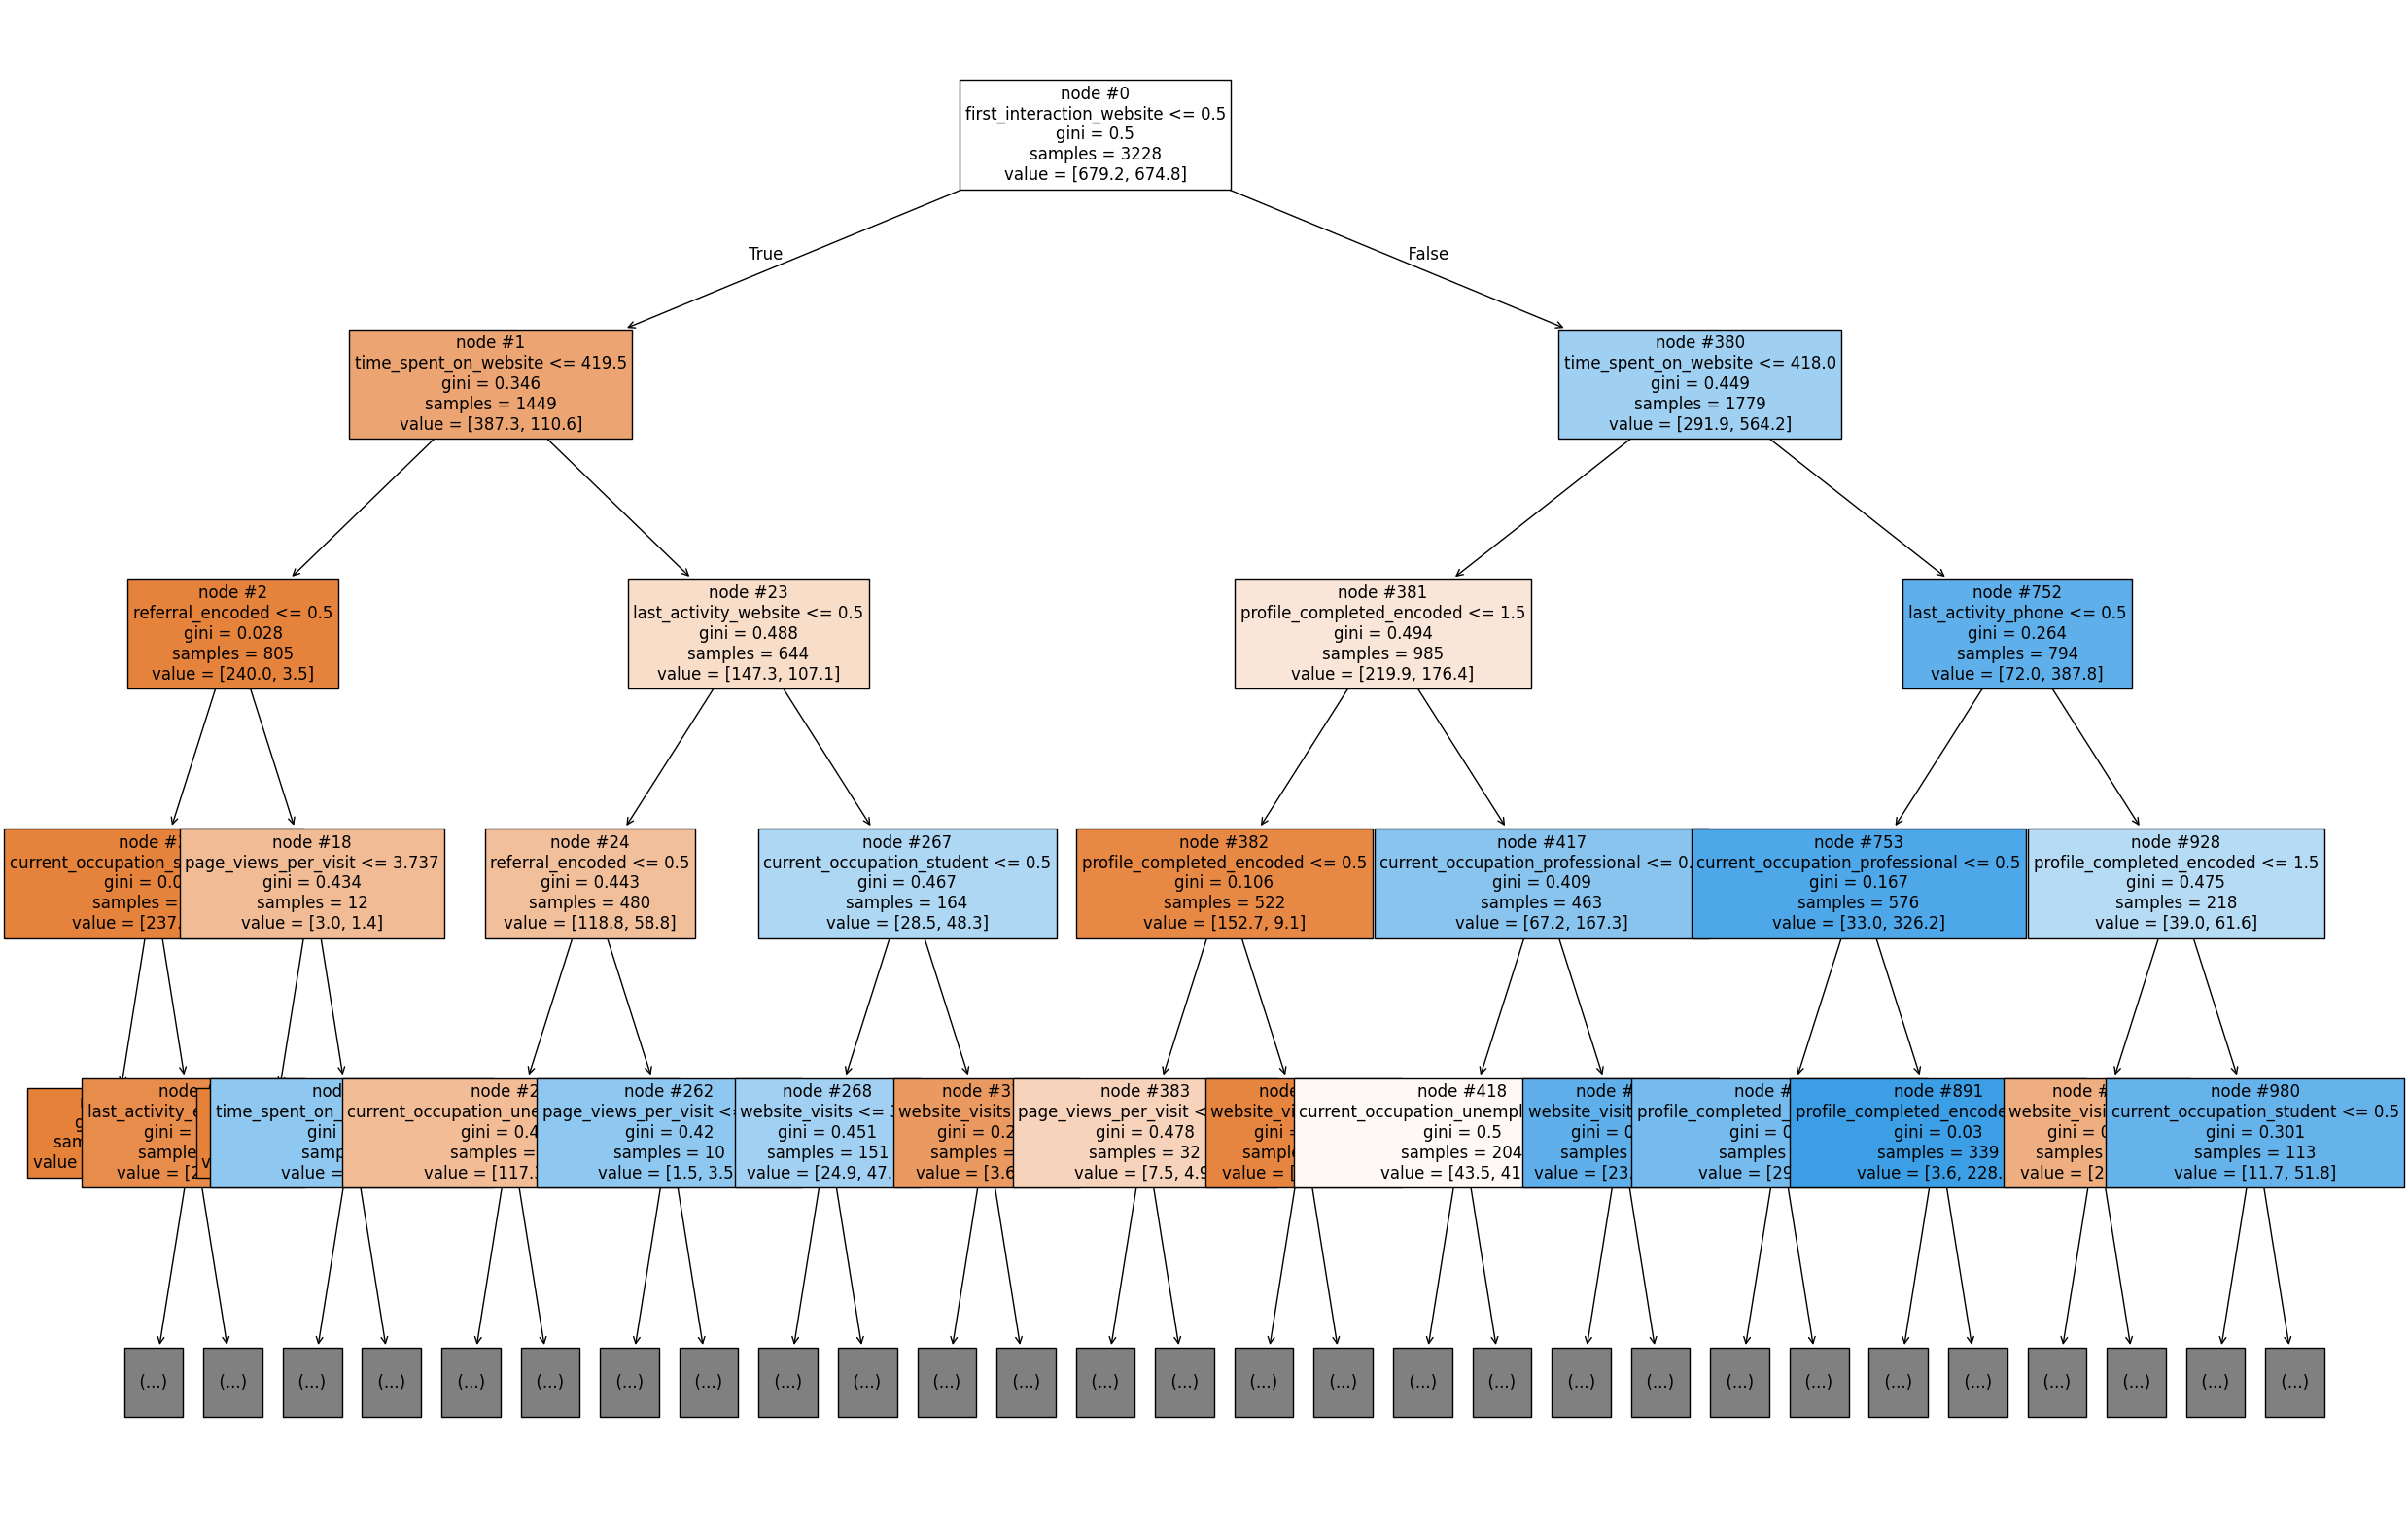

In [51]:
# Algorithms to use
from sklearn import tree

features = list(df.drop(columns=['status']).columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = None)

plt.show()

## Building a Random Forest model

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample, a decision tree makes a prediction.

**The results from all the decision trees are combined and the final prediction is made using voting (for classification problems) or averaging (for regression problems).**

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Fitting the Random Forest classifier on the training data
#rf_estimator = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)
rf_estimator = RandomForestClassifier(class_weight = {0: convrted, 1: not_convrted}, random_state = 1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



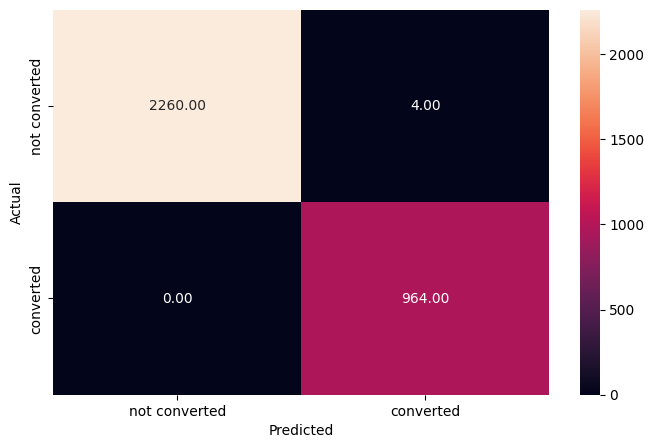

In [53]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       971
           1       0.77      0.70      0.73       413

    accuracy                           0.85      1384
   macro avg       0.82      0.81      0.81      1384
weighted avg       0.84      0.85      0.84      1384



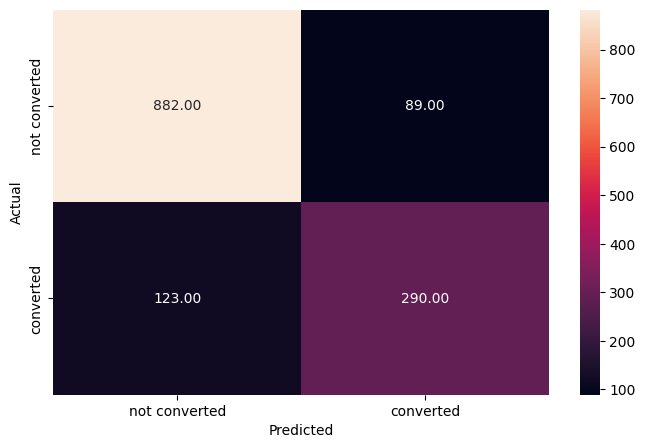

In [54]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

* Random Forest classifier is overfitting the training data.
* recall score on the training data is 1, while the recall score on the test data is only 0.71 for converted customer.
* Precision is high for the test data as well.


In [55]:
import sklearn as sk
sk.__version__ #1.6.1

'1.6.1'

In [56]:
# Fine
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score


parameters_rf = {
    "n_estimators" : [100, 250, 500],
    "min_samples_leaf" : np.arange(1, 4, 1),
    "max_features" : [0.7, 0.9, 'sqrt'], #same as auto as per documentation
}

scorer = metrics.make_scorer(recall_score, pos_label = 1)


gridCV = GridSearchCV(rf_estimator, parameters_rf, scoring = scorer, cv = 5)
gridCV = gridCV.fit(X_train, y_train)
rf_estimator_tuned = gridCV.best_estimator_


# sklearn.utils._param_validation.InvalidParameterError:
# The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [57]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       min_samples_leaf=np.int64(3), random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2264
           1       0.83      0.90      0.87       964

    accuracy                           0.92      3228
   macro avg       0.89      0.91      0.90      3228
weighted avg       0.92      0.92      0.92      3228



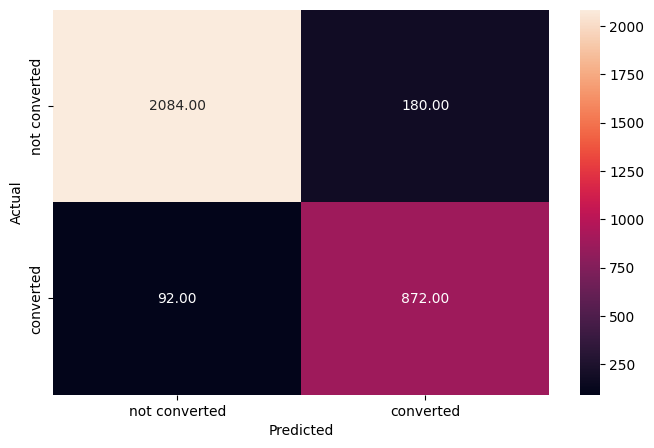

In [58]:
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       971
           1       0.75      0.80      0.77       413

    accuracy                           0.86      1384
   macro avg       0.83      0.84      0.84      1384
weighted avg       0.86      0.86      0.86      1384



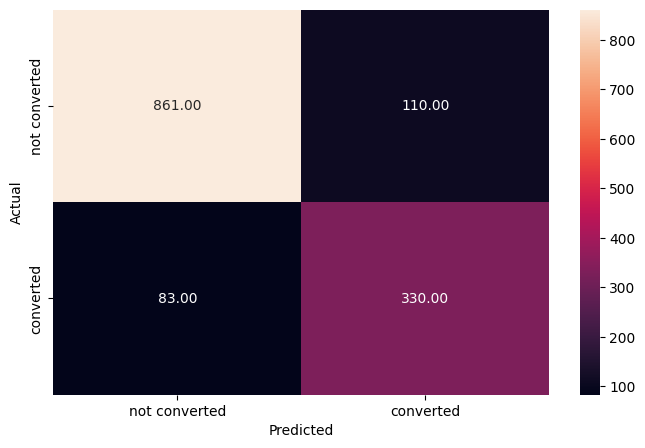

In [59]:
y_pred_test_rf = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

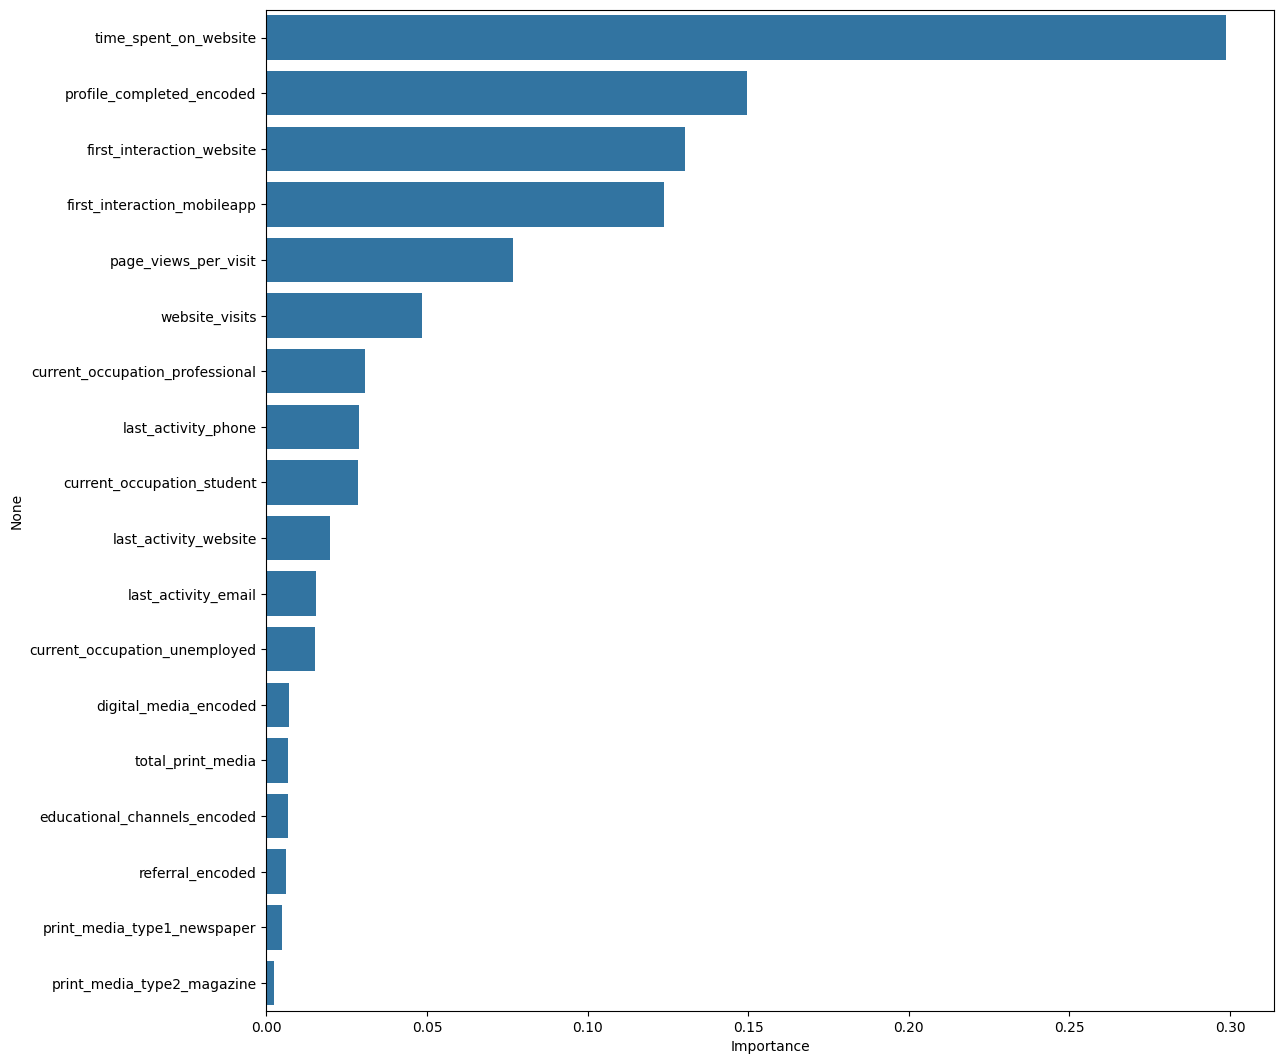

In [60]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = df.drop(columns=['status']).columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

plt.show()

Observations:

* recall score difference between train and test is significantly high thus overfitting.
* above is applicable for precision and f1-score metric as well.
* Important features are time spent on website, profile completed, first interaction using website and then mobile app.


## Building a Gradient Boosting model

In [61]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]

# AdaBoostCLassifier:
  #Adaptive Boosting - starts with a Decision tree simple model.
  #Iterative training.
  #Weights for samples.
  #Weights for learners (Better performing Decision Tree models).
  #Combining predictions (based on prediction weighted by its importance).
  # Less prone to overfitting than Gradient Boosting.(sometimes)

# GradientBoostingClassifier:
  # Sequential - builds Decision tree model sequentially.
  # Fits to residual - Each trying to correct errors or the previous ones.
  # Adjusts the learning rate.
  # More flexible than Adaboost, can be prone to overfitting.


from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

#GradientBoosting Classifier - #random_state - algorithm input remain same.
gradboost_model = GradientBoostingClassifier(random_state=1)

# Fitting the model
adaboost_model.fit(X_train, y_train)

# Fitting the gradient model
gradboost_model.fit(X_train, y_train)



GradientBoostingClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2264
           1       0.74      0.64      0.69       964

    accuracy                           0.83      3228
   macro avg       0.80      0.77      0.78      3228
weighted avg       0.82      0.83      0.82      3228



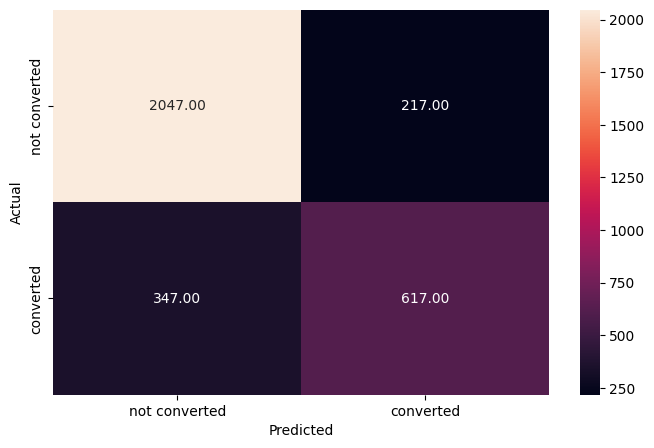

In [62]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

y_pred_train_adab = adaboost_model.predict(X_train)
metrics_score(y_train, y_pred_train_adab)


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       971
           1       0.73      0.65      0.69       413

    accuracy                           0.82      1384
   macro avg       0.79      0.77      0.78      1384
weighted avg       0.82      0.82      0.82      1384



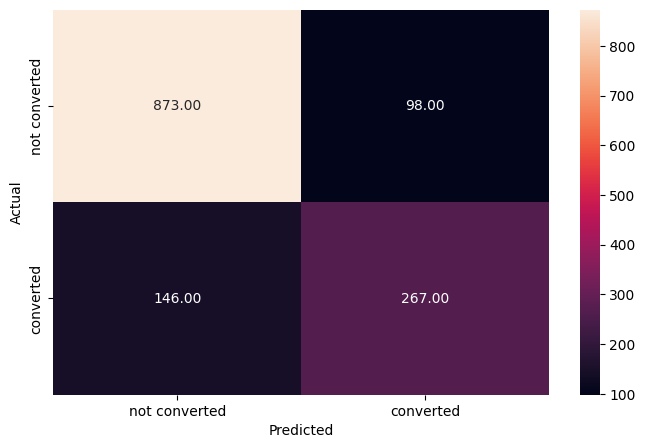

In [63]:
y_pred_test_adab = adaboost_model.predict(X_test)
metrics_score(y_test, y_pred_test_adab)

Observation:
Adaptive Boosting algorithm

* Performance of the model is good.
* Model is able to generalize better with the recall score.



              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2264
           1       0.83      0.77      0.80       964

    accuracy                           0.88      3228
   macro avg       0.86      0.85      0.86      3228
weighted avg       0.88      0.88      0.88      3228



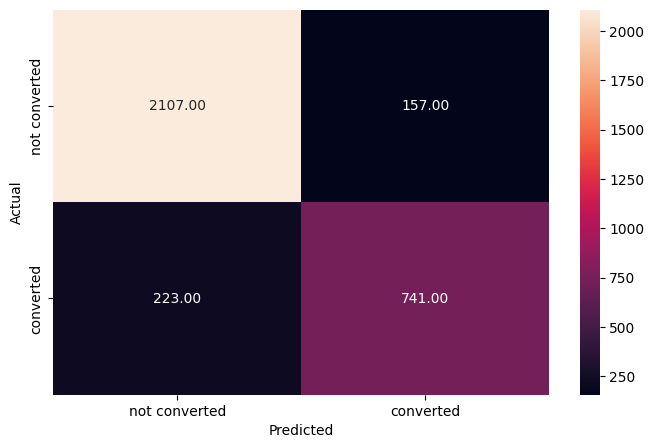

In [64]:
#Gradient Boosting mode predict
y_pred_train_grad = gradboost_model.predict(X_train)
metrics_score(y_train, y_pred_train_grad)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       971
           1       0.79      0.75      0.77       413

    accuracy                           0.87      1384
   macro avg       0.84      0.83      0.84      1384
weighted avg       0.86      0.87      0.86      1384



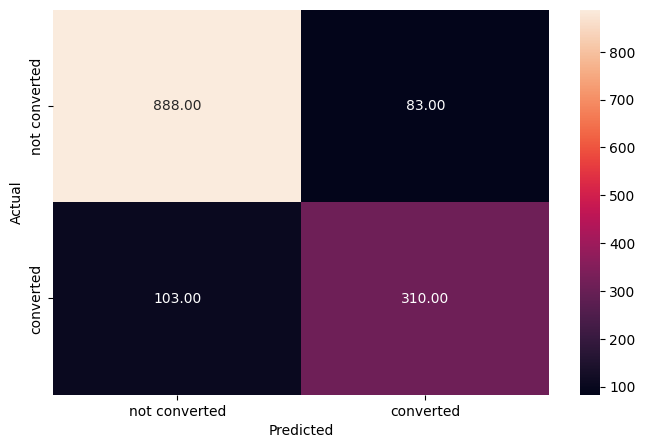

In [65]:
#GradientBoost Train 0.82      0.78      0.80
#GradientBoost Test  0.77      0.75      0.76

y_pred_test_grad = gradboost_model.predict(X_test)
metrics_score(y_test, y_pred_test_grad)

Observation:
Gradient Boosting

* Gradient Boosting model performance is good.
* Model is able to generalize better with the recall score.


### XGBoost
* XGBoost stands for Extreme Gradient Boosting.
* XGBoost is a tree-based ensemble machine learning technique that improves prediction power and performance by improvising on the Gradient Boosting framework and incorporating reliable approximation algorithms.

In [66]:
#Installing the xgboost library using the 'pip' command.
!pip install xgboost

In [67]:
import xgboost
xgboost.__version__

'3.0.4'

In [68]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['status']), df['status'], test_size=0.3, random_state=42, stratify= df['status'])

# refer to the above code.
# print(type(y_train)) #pandas <class 'pandas.core.series.Series'>
# print(type(y_test)) #pandas <class 'pandas.core.series.Series'>
# print(type(X_train.shape)) #tuple (3228, 18)
# print(type(y_train.shape)) # tuple (3228,)

# print(X_train.head()) #  (3228, 18); 3228 records having 18 input variables.
# print(y_train.head()) # type tuple. (1384,) records - refer above comment.


In [69]:
# XGBClassifier is a class in the xgboost library that implements the Extreme Gradient Boosting
# algorithm for classification tasks.
# It's based on the Gradient Boosting framework but includes several enhancements for
# performance and accuracy, such as regularization, handling missing values, and parallel processing.

# Essentially, it builds an ensemble of decision trees sequentially, where each new tree tries to correct the
# errors of the previous ones.
# This process is optimized to be highly efficient and effective, making XGBoost a popular choice for
# many machine learning challenges, especially when dealing with structured data and aiming for high predictive
# accuracy.


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2264
           1       0.99      0.99      0.99       964

    accuracy                           0.99      3228
   macro avg       0.99      0.99      0.99      3228
weighted avg       0.99      0.99      0.99      3228



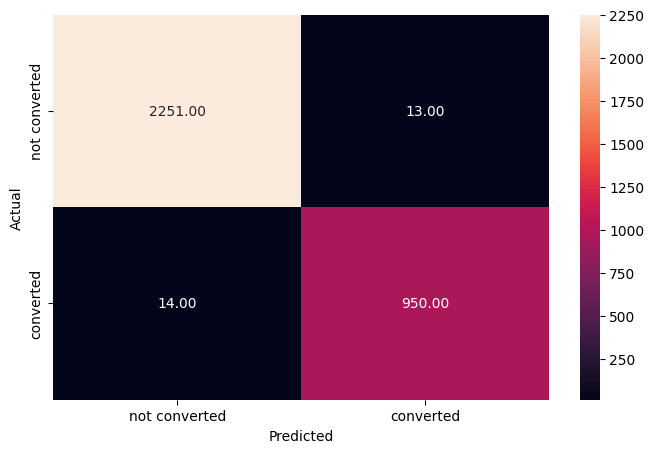

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       971
           1       0.76      0.73      0.74       413

    accuracy                           0.85      1384
   macro avg       0.82      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



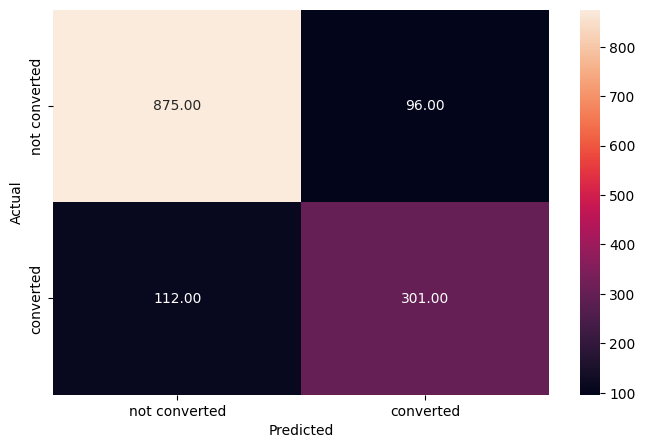

In [70]:
# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_train,y_train)

#predict training input
y_pred_train_xgb = xgb.predict(X_train)
metrics_score(y_train, y_pred_train_xgb)

#predict test input
y_pred_test_xgb = xgb.predict(X_test)
metrics_score(y_test, y_pred_test_xgb)


Observation:

* Training: Precision 0.99 / Recall 0.99 / F1-Score 0.99
* Test : Precision 0.73 / Recall 0.71 / F1-Score 0.72
* xtreme gradient boosting model training performance is overfitting.


In [71]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# help(accuracy_score)

# from sklearn.metrics import recall_score
# help(recall_score)


# parameter - average = 'macro' - applicable for metrics precision/recall/f1score

# average = 'macro': This parameter specifies how to calculate the average recall for multiclass classification problems.
# In your case, although it's a binary classification problem (Attrition or Not Attrition), average='macro' is still a valid option.
# When average='macro', the recall is calculated independently for each class (Attrition and Not Attrition), and then the unweighted average of
# these per-class recall scores is taken. This means that the recall for each class contributes equally to the overall macro average recall,
# regardless of the number of instances in each class.

## Model Performance evaluation and improvement


In [72]:
# xgboost XGBClassifier tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# from sklearn.metrics import accuracy_score

#reference hyperparameters
# https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier

parameters_xgbc = {
    "n_estimators" : [100, 250, 500],
    "learning_rate" : [0.01, 0.05, 0.1],
    "max_depth" : np.arange(3, 7, 1), # 3, 4, 5, 6
    # above is partly selected features from gemini

    ## Below is from my understanding
    "booster" : ['gbtree'],
    "tree_method" : ['exact'],
    "random_state" : [2]
}


#XGB - optimized, highly effective especially for structure data, aiming for high predictive accuracy
#below code uses sklearn metric - recall -> TP/(TP + FN); precision -> TP/TP+FP; accuracy -> TP+TN/(TP+TN+FP+FN);
scorer = metrics.make_scorer(recall_score, pos_label = 1)


gridCV = GridSearchCV(xgb, parameters_xgbc, scoring = scorer, cv = 5)
gridCV = gridCV.fit(X_train, y_train)
xgbc_tuned = gridCV.best_estimator_


# sklearn.utils._param_validation.InvalidParameterError:
# The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

<!-- Recommended by Gemini  -->
Based on industry best practices, here are some recommended hyperparameters for `XGBClassifier` to consider tuning:

*   **`n_estimators`**: The number of boosting rounds or trees to build. A higher number can improve performance but increases the risk of overfitting.
*   **`learning_rate` (or `eta`)**: Controls the step size shrinkage during boosting. Smaller values require more estimators but can lead to better accuracy and prevent overfitting.
*   **`max_depth`**: The maximum depth of the individual trees. Limits the complexity of the trees and helps prevent overfitting.
*   **`subsample`**: The fraction of samples used to train each tree. Can help prevent overfitting by introducing randomness.
*   **`colsample_bytree`**: The fraction of features used when building each tree. Also helps prevent overfitting by introducing randomness.
*   **`gamma`**: Controls the minimum loss reduction required to make a further partition on a leaf node of the tree. Larger values make the model more conservative.
*   **`reg_alpha` (L1 regularization)**: Applies L1 regularization to the weights. Can help with feature selection.
*   **`reg_lambda` (L2 regularization)**: Applies L2 regularization to the weights.
*   **`scale_pos_weight`**: Controls the balance of positive and negative weights. Useful for imbalanced datasets.

It's important to note that the optimal hyperparameters can vary depending on your specific dataset and problem. You'll likely need to experiment with different values and use techniques like cross-validation and grid search (`GridSearchCV`) or random search (`RandomizedSearchCV`) to find the best combination for your data.

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2264
           1       0.82      0.77      0.80       964

    accuracy                           0.88      3228
   macro avg       0.86      0.85      0.86      3228
weighted avg       0.88      0.88      0.88      3228



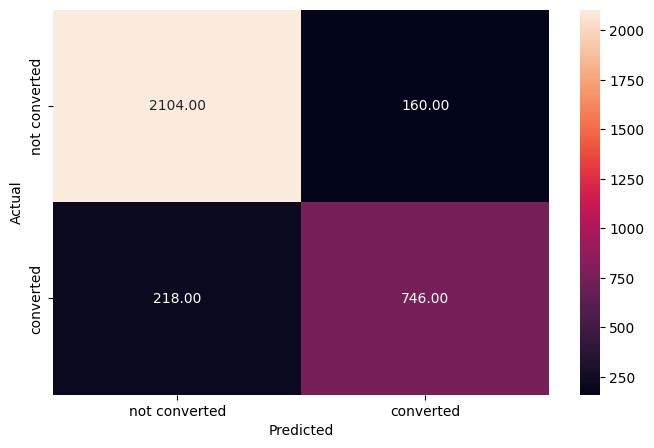

In [73]:
#XGBC tuned train
y_pred_train_xgbc = xgbc_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_xgbc)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       971
           1       0.79      0.76      0.77       413

    accuracy                           0.87      1384
   macro avg       0.84      0.84      0.84      1384
weighted avg       0.87      0.87      0.87      1384



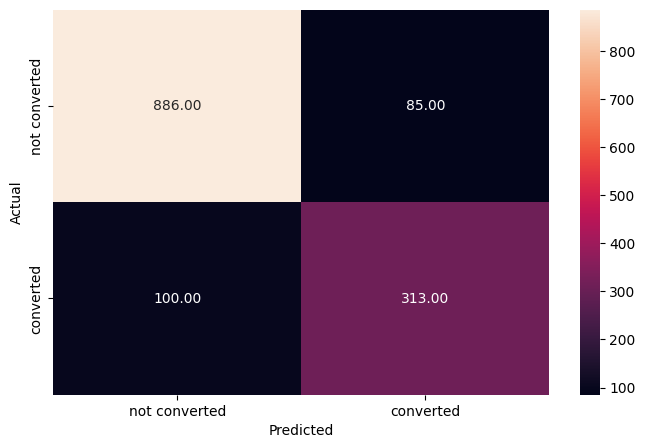

In [74]:
# Checking performance on the testing data
y_pred_test_xgbc = xgbc_tuned.predict(X_test)
metrics_score(y_test, y_pred_test_xgbc)

Observations:

*   Post performance tuning model performance is improved.
*   Based on the recall & precision score XGBoostClassifier is able to generalize better.



In [75]:
type(df.columns)

pandas.core.indexes.base.Index

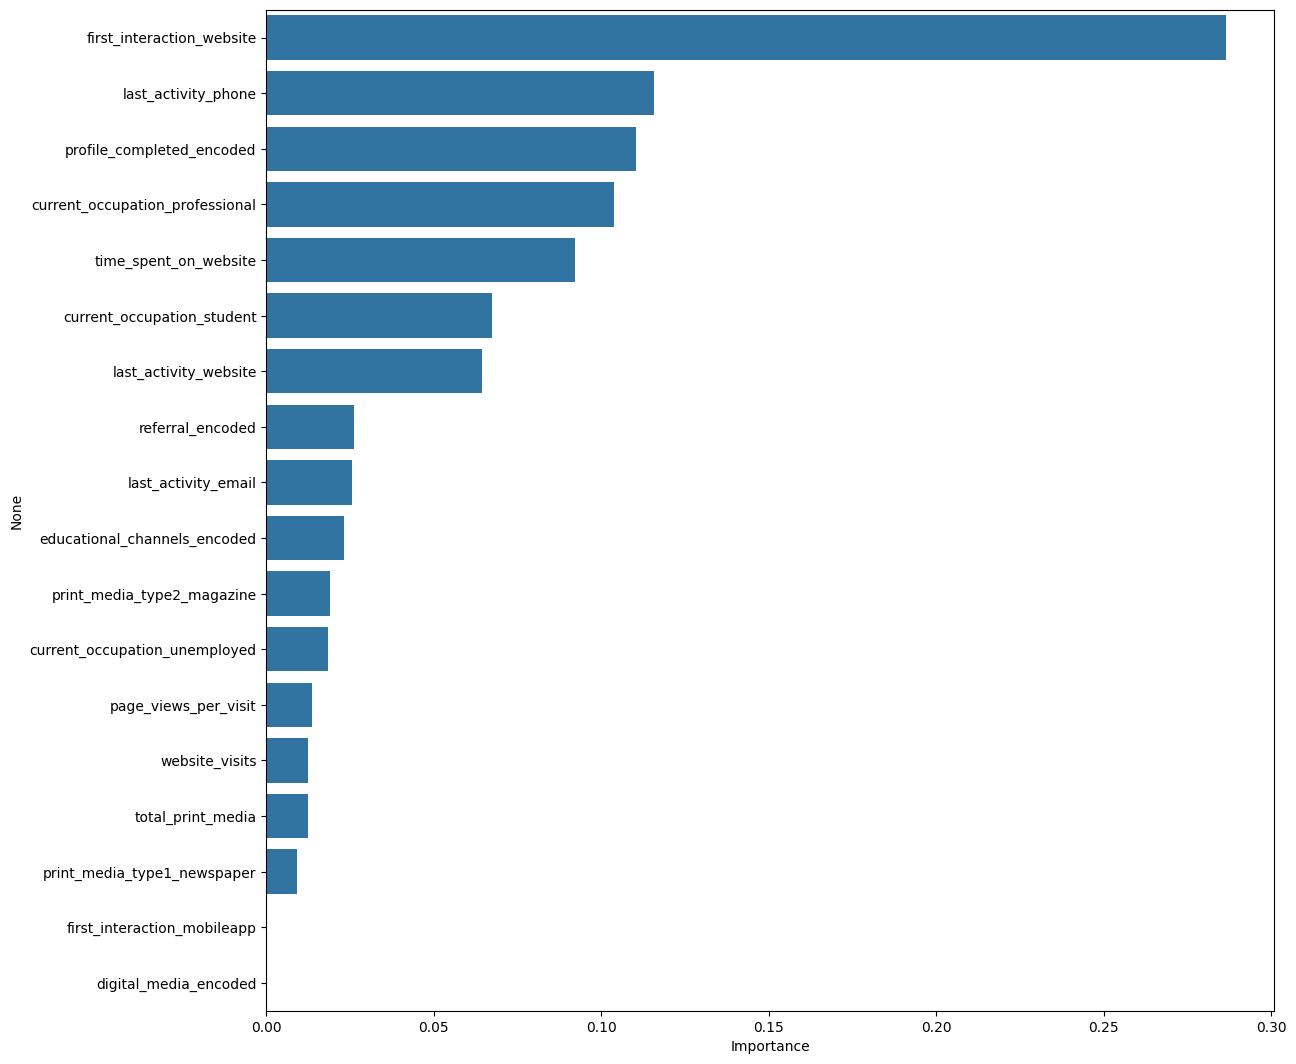

In [76]:
#feature importance of xgboost tuned.
# Plotting feature importance

importances_xgbc = xgbc_tuned.feature_importances_ #ndarray

columns = df.drop(columns=['status']).columns #type - <class 'pandas.core.indexes.base.Index'>

importance_df_xgbc = pd.DataFrame(importances_xgbc, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df_xgbc.Importance, y= importance_df_xgbc.index)

plt.show()

In [77]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

def compute_model_metrics(model, feature_var, y_true):

  # feature_var - feature variables / independet variables

  # actual_var - target / ground

  """
    function to compute different metrics to check classification model performance
    and collate them in a dataframe

    model: classifier

    feature_var: independent variables

    y_true: dependent variable
  """

  #predicting using the independent variables

  y_pred = model.predict(feature_var)

  recall = recall_score(y_true=y_true, y_pred = y_pred, average='macro')

  precision = precision_score(y_true=y_true, y_pred = y_pred, average='macro')

  accuracy = accuracy_score(y_true=y_true, y_pred = y_pred)

  # acc = accuracy_score(y_true=y_true, y_pred = y_pred

  df_metrics = pd.DataFrame(
      {
          "Precision":  precision,
          "Recall":  recall,
          "Accuracy": accuracy,
      },
      index = [0]
  )

  return df_metrics



In [78]:

# %whos #command to list out the variable in the python colab notebook.

dtree_estimator_metrics = compute_model_metrics(dtree_estimator, X_test, y_test)

rf_estimator_tuned_metrics = compute_model_metrics(rf_estimator_tuned, X_test, y_test)

adaboost_model_metrics = compute_model_metrics(adaboost_model, X_test, y_test)

gradboost_model_metrics = compute_model_metrics(gradboost_model, X_test, y_test)

xgbc_tuned_metrics = compute_model_metrics(xgbc_tuned, X_test, y_test)



collated_metrics = pd.concat(

          [dtree_estimator_metrics.T,
           rf_estimator_tuned_metrics.T,
           adaboost_model_metrics.T,
           gradboost_model_metrics.T,
           xgbc_tuned_metrics.T
           ],
          axis=1
)

collated_metrics.columns = [
    'Decision_Tree_clss',
    'Random_Forest_clss',
    'Adaboost_clss',
    'Gradientboost_clss',
    'XGBoost_clss'
]

print('---'*50)
print(collated_metrics)



------------------------------------------------------------------------------------------------------------------------------------------------------
           Decision_Tree_clss  Random_Forest_clss  Adaboost_clss  \
Precision            0.779654            0.831038       0.794115   
Recall               0.828658            0.842873       0.772781   
Accuracy             0.800578            0.860549       0.823699   

           Gradientboost_clss  XGBoost_clss  
Precision            0.842434      0.842506  
Recall               0.832563      0.835165  
Accuracy             0.865607      0.866329  



Based on the metrics recall / sensitivity of various models in the above table, below models generalize better and listed in order.
  
* XGBClassifier of xgboost.
* GradientBoostingClassifier of sklearn.
* Decision Tree.
* Random Forest classifier.
* AdaptiveBoosting classifier.



---
Top 5 five features of the models as per the order above:
---

XGBoost Classifier

* first_interaction_website
* last_activity_phone
* profile_completed_encoded
* current_occupation_professional
* time_spent_on_website

Decision Tree

* time_spent_on_website
* first_interaction_website
* profile_completed_encoded
* last_activity_phone
* last_activity_website

Random Forest

* time_spent_on_website
* profile_completed_encoded
* first_interaction_website
* first_interaction_mobileapp
* page_views_per_visit




Key differences between sklearn GradientBoostingClassifier and XGBClassifier:

* Regularization: XGBoost includes built-in regularization (L1 and L2) which helps prevent overfitting and improves generalization. Scikit-learn's implementation has fewer regularization options.
* Handling Missing Values: XGBoost has a more sophisticated way of handling missing values by learning the best direction to go when a split encounters a missing value. Scikit-learn's implementation requires explicit handling of missing values (e.g., imputation).
* Speed and Performance: XGBoost is generally faster and more efficient due to optimized algorithms and parallel processing capabilities.
* Features and Functionality: XGBoost offers more advanced features like built-in cross-validation, early stopping, and the ability to handle different objective functions.


Regularization (reference):
*Without regularization: The model tries to fit the training data perfectly, even if it means using very complex patterns that won't generalize to new data. It's like trying to draw a line that goes through every single point in a scatter plot, even the outliers, resulting in a wiggly, complex line.*

*With L1 (Lasso) regularization: This technique adds a penalty to the model's complexity based on the absolute values of the model's coefficients (the weights it assigns to each feature).
This penalty encourages the model to use fewer features and can even set some coefficients to zero, effectively performing feature selection.
It's like drawing a simpler line that captures the general trend without being overly influenced by individual points.*

*With L2 (Ridge) regularization: This technique adds a penalty based on the squared values of the model's coefficients. This penalty encourages the model to use smaller coefficients overall, distributing the weight more evenly across features. It's like drawing a smooth curve that minimizes the impact of any single point, resulting in a more stable line.*



In [81]:
df.columns

Index(['website_visits', 'time_spent_on_website', 'page_views_per_visit',
       'status', 'current_occupation_unemployed',
       'current_occupation_professional', 'current_occupation_student',
       'first_interaction_website', 'first_interaction_mobileapp',
       'profile_completed_encoded', 'last_activity_email',
       'last_activity_phone', 'last_activity_website',
       'print_media_type1_newspaper', 'print_media_type2_magazine',
       'digital_media_encoded', 'educational_channels_encoded',
       'referral_encoded', 'total_print_media'],
      dtype='object')

## Actionable Insights and Recommendations

**Recommendations:**

* Seasonal Discount can be offered to boost the lead conversion.
* Custom learning offer can be provided to batch of leads.
* Discount can be granted to lead referrals and value-relationship customer.
* Enable efficient touchpoints improving marketing via digital & other communication channels.


**Factors driving the lead conversion process**

*   Website Interaction : Leads spending time on the website in understanding the learning content.
*   Profile Completion: Leads filling up the profile info completely or majority of it.
*   Time spent on website is also an important feature.
*   Page views by Professional and Students about learning content.

**Profile of the leads which are likely to convert**

* Occupation: Professional / Unemployed / Student
* Age:  Min 18.
        25% in dataset is 36 and less.
        50% in dataset is 51 and less.
        75% in dataset is 57 and less.
        Max age is 63.
* Website visits: At least 3 time average and maximum of 30.
* Timespent on website: 150 / 1337 / 2537 secs.
* Page Views: At least 3 pages and maximum of 18.



